<a href="https://colab.research.google.com/github/alexdel1/graph_csv_to_svg/blob/main/RepGAF1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 [![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)
[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)
[![made-with-Markdown](https://img.shields.io/badge/Made%20with-Markdown-1f425f.svg)](http://commonmark.org)
[![made-with-mathjax](https://img.shields.io/badge/Made%20with-MathJax-1f425f.svg)](https://www.mathjax.org/)
[![GitHub](https://badgen.net/badge/icon/github?icon=github&label)](https://github.com/alexdel1/TestPresentation/)
<a href="https://colab.research.google.com/github/alexdel1/TestPresentation/blob/main/RepresentationGroupesAbeliens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>  
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/alexdel1/TestPresentation/HEAD)  
[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/alexdel1/TestPresentation/blob/main/RepGAF1_0.ipynb.ipynb)



Rappel : Menu View : \
Toggle zen mode (not available im jupyter lab)\
: Appearance :\
Table of Contents (tick numbered AND untick first header) \
only simple interface

Menu Settings : Jupyter dark

Test regularly on Binder-JupyterLab-Zoom \
Make a back-up pdf(slide) and html

**create** a **vm** with binder and edit from github dev...
%%load ...notebook pour avoir accès à deux notebook en même temps (équivalent à un import de github)

In [ ]:
!jupyter server list

Currently running servers:


In [ ]:
!jupyter server list | grep -oP 'token=\K[^ ]+'

In [ ]:

import os
print(os.environ.get('COLAB_RELEASE_TAG', 'Not in Colab'))

release-colab_20241209-060127_RC00


empty cell to drag the output to get the token for zoom

Nom : Alexandre Delode \
Date : 05/12/2024 \

Réf : B. Steinberg, Representation theory of finite groups

##### Macros Latex et Bibliothèques Python


**Macros Latex:**

```latex
$
\def\GL{\mathbb{GL}}
\def\RR{\mathbb{R}}
\def\ZZ{\mathbb{Z}}
$
```

$
\def\GL{\mathbb{GL}}
\def\RR{\mathbb{R}}
\def\ZZ{\mathbb{Z}}
$
$$
\require{color}
\newcommand{\doubleequivl}
{\mathrel{\overset{\text{irr}}{\mathrel{\overset{\color{red}\Longleftarrow}{\Longrightarrow}}}}}\newcommand{\doubleequivr}
{\mathrel{\overset{\mathrm{deg}=1}{\mathrel{\overset{\color{red}\Longrightarrow}{\Longleftarrow}}}}}$$

Test: Maintenant $\GL(n, \RR)$ fonctionne directement dans le markdown.

In [ ]:

%%capture
!pip install git+https://github.com/alexdel1/graph_csv_to_svg.git
!sudo apt update
!sudo apt install graphviz libgraphviz-dev
!pip install pygraphviz
!pip install dot2tex
!sudo apt install pdf2svg
!sudo apt update
!sudo apt install texlive-xetex

In [ ]:
#!pip uninstall graph_csv_to_svg

In [ ]:
#!pip install --force-reinstall git+https://github.com/alexdel1/graph_csv_to_svg.git

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:

import pandas as pd
import io
import unicodedata
import re
import networkx as nx
import pygraphviz # Import the Graph class
from networkx.drawing.nx_pydot import to_pydot
from IPython.display import SVG
import subprocess
from IPython.display import Markdown, display
from graph_csv_to_svg import *

# **Représentation des groupes abéliens** <!-- omit in toc -->

## Rappel groupe abélien fini

### Définition

#### Groupe

Un ensemble et une loi de composition interne (LCI) :
* un symétrique pour chaque élément
* associative
* un élément neutre

#### Abélien


$$ x \cdot y = y \cdot x \,\,\,\,\, \forall x, y \in G $$

#### Fini

$$\mathrm{card}(G)<\infty$$

<details>
<summary>À ne pas confondre avec de "type fini"</summary>

$$\forall x \in G, \, \exists x_1, x_2, \dots, x_s \in G \text{ et } \exists n_1, n_2, \dots, n_s \in \mathbb{Z} \text{ tel que } x = n_1 x_1 + n_2 x_2 + \cdots + n_s x_s$$
où $ s $ est un nombre fini fixé.


Une autre définition équivalente est que le rang défini ci-dessous doit être fini :

$$\mathrm{rang}(G) = \min \left( |X| \mid \langle X \rangle = G\right) $$
</details>

### Exemples

Si $G$ est un groupe abélien et $\sim$ est compatible, alors $G /\sim$ est aussi abélien.

Un groupe cyclique est un groupe qui est à la fois fini et monogène.

Tout groupe cyclique est abélien. (Ex : $\mathbb{Z}/ n \mathbb{Z}$)

Tout sous-groupe d'un groupe abélien fini est abélien et fini.

Tout produit direct d'une famille finie de groupes abéliens finis est un groupe abélien fini.

### Contre exemples

Le groupe linéaire général $\left( \mathbb{GL}(n, K)  \right)$, constitué des matrices inversibles $\left( n \times n \right)$ à coefficients dans un corps \( K \), **n'est pas abélien** pour \( n > 1 \). \

### Théorème de structure des groupes abéliens finis

## Rappel de la théorie de la représentation des groupes

### Définition

####Algèbre de groupe L(G)


<u>Algèbre de groupe 4.2.1</u>

Soit $G$ un groupe et définissons $L(G) = \mathbb{C}^G = \{f \mid f : G \to \mathbb{C}\}$. Alors $L(G)$ est un espace **préhilbertien** avec l'addition et la multiplication scalaire données par
$\begin{align*}
    (f_1 + f_2)(g) &= f_1(g) + f_2(g), \\
    (cf)(g) &= c \cdot f(g),
\end{align*}$

et avec le produit hermitien défini par
$\langle f_1, f_2 \rangle = \frac{1}{|G|} \sum_{g \in G} f_1(g) \overline{f_2(g)}$.

#### Fonction de classe et $Z(G)$

<u>Fonction de classe 4.3.6</u>:

$f: G \rightarrow \mathbb{C}$ tel que $f(g) = f(hgh^{-1}) \quad \forall g, h \in G$.

Fonction constante sur les classes de conjugaison.

$\underline{Z(L(G)) \text{4.3.6}}:$

$Z(L(G))=\{f : G \to \mathbb{C} \mid f(g) = f(hgh^{-1}) \quad \forall g, h \in G \} $

Espace des fonctions de classe.

Alternative to github for dev:

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#%%capture
#%run "/content/drive/MyDrive/Colab Notebooks/csv_to_svg_c.ipynb"

In [ ]:

csv_col=r"""week,color
week1,black
week2,black
week3,black
week4,black
week5,black
week6,black
week7,black
"""
csv_col_df= pd.read_csv(io.StringIO(csv_col), comment='#')
#print(csv_col)
csv_col_list=[csv_col_df.copy() for i in range(7)]
#print(csv_col_list)
for i in range(7):
       #print(i)
       csv_col_list[i].loc[csv_col_list[i].index==i,'color']='red'
       csv_col_list[i].loc[csv_col_list[i].index>i,'color']="transparent"
#print(csv_col_list)
dict_col_list = [dict(zip(df.week, df.color)) for df in csv_col_list]
#print(dict_col_list)


csv_col_df= pd.read_csv(io.StringIO(csv_col), comment='#')
#print(csv_col)
csv_col_list=[csv_col_df.copy() for i in range(7)]
#print(csv_col_list)
for i in range(7):
       #print(i)
       csv_col_list[i].loc[csv_col_list[i].index==i,'color']='red'
       csv_col_list[i].loc[csv_col_list[i].index>i,'color']="black!0"
#print(csv_col_list)
dict_col_list_edge = [dict(zip(df.week, df.color)) for df in csv_col_list]
#print(dict_col_list_edge)

/usr/local/lib/python3.10/dist-packages/graph_csv_to_svg/csv_to_svg_c.py:264: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  B['shape'].fillna("rectangle", inplace=True)
/usr/local/lib/python3.10/dist-packages/graph_csv_to_svg/csv_to_svg_c.py:265: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

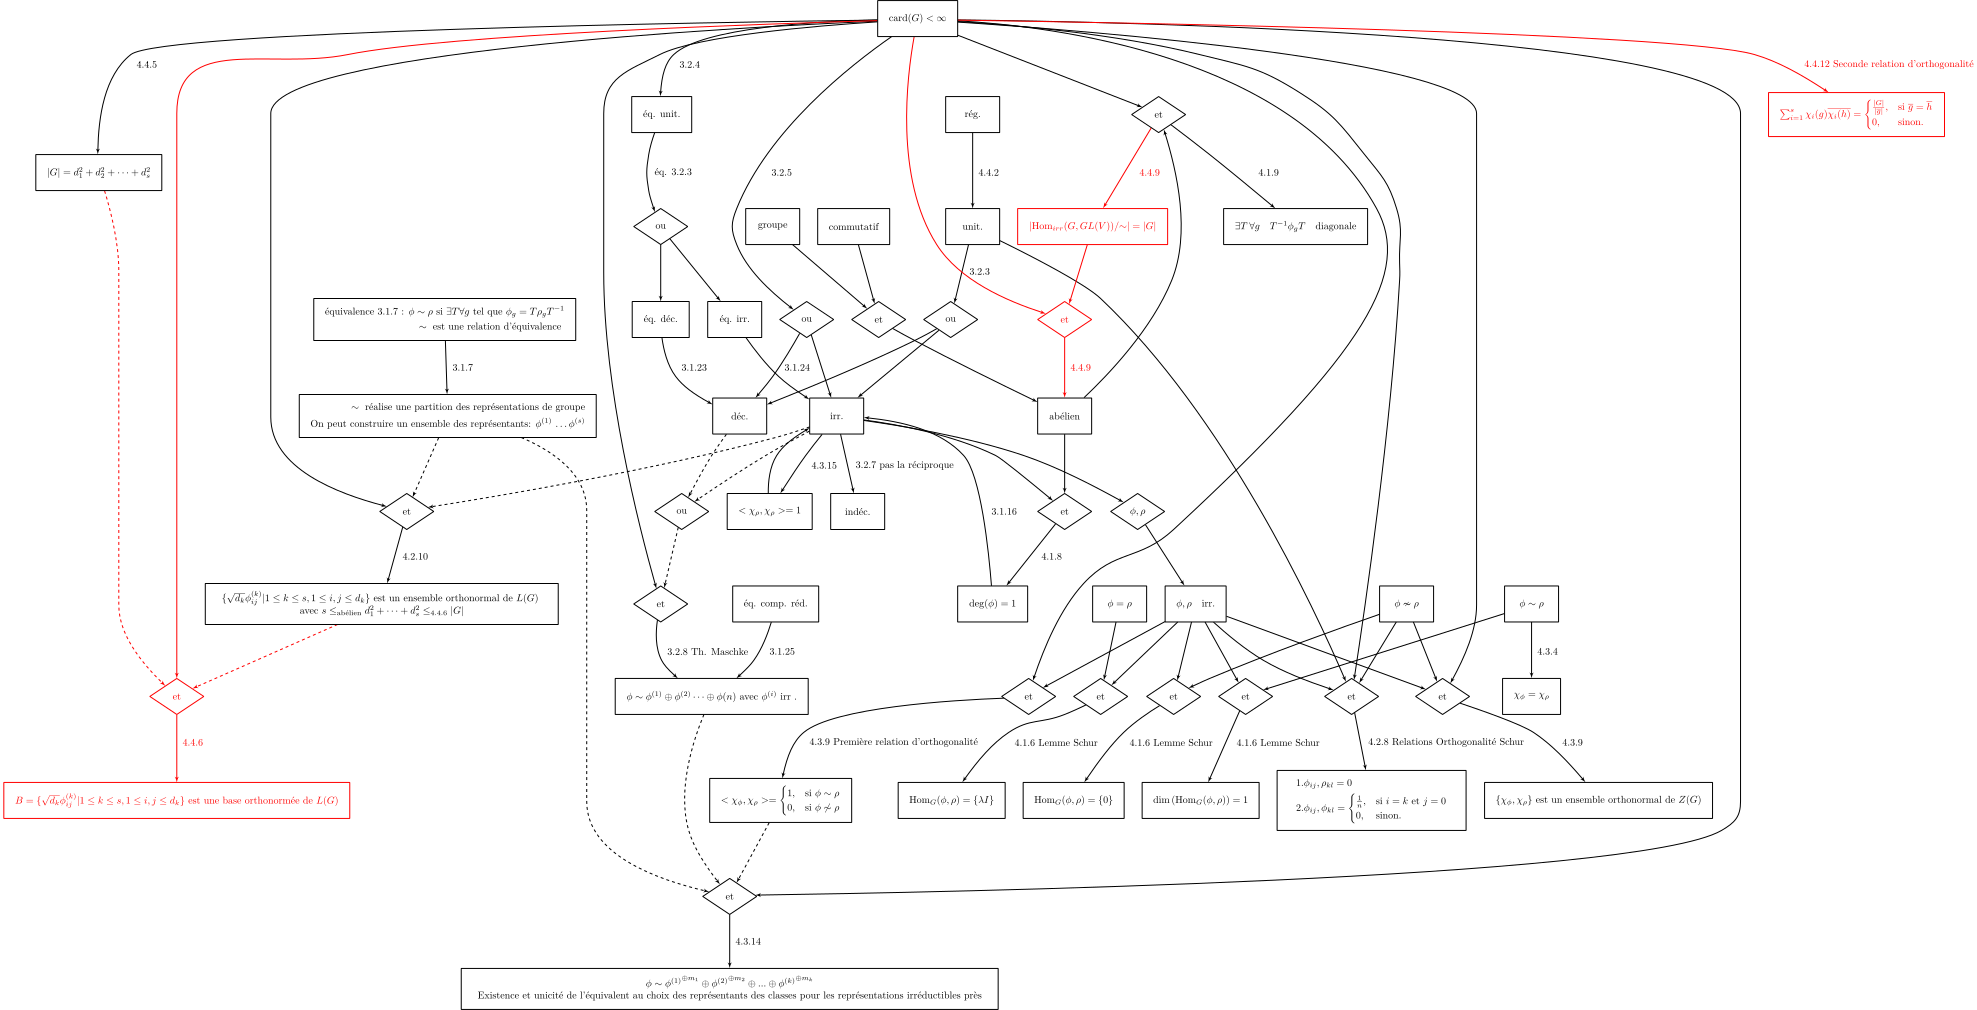

/usr/local/lib/python3.10/dist-packages/graph_csv_to_svg/csv_to_svg_c.py:264: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  B['shape'].fillna("rectangle", inplace=True)
/usr/local/lib/python3.10/dist-packages/graph_csv_to_svg/csv_to_svg_c.py:265: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

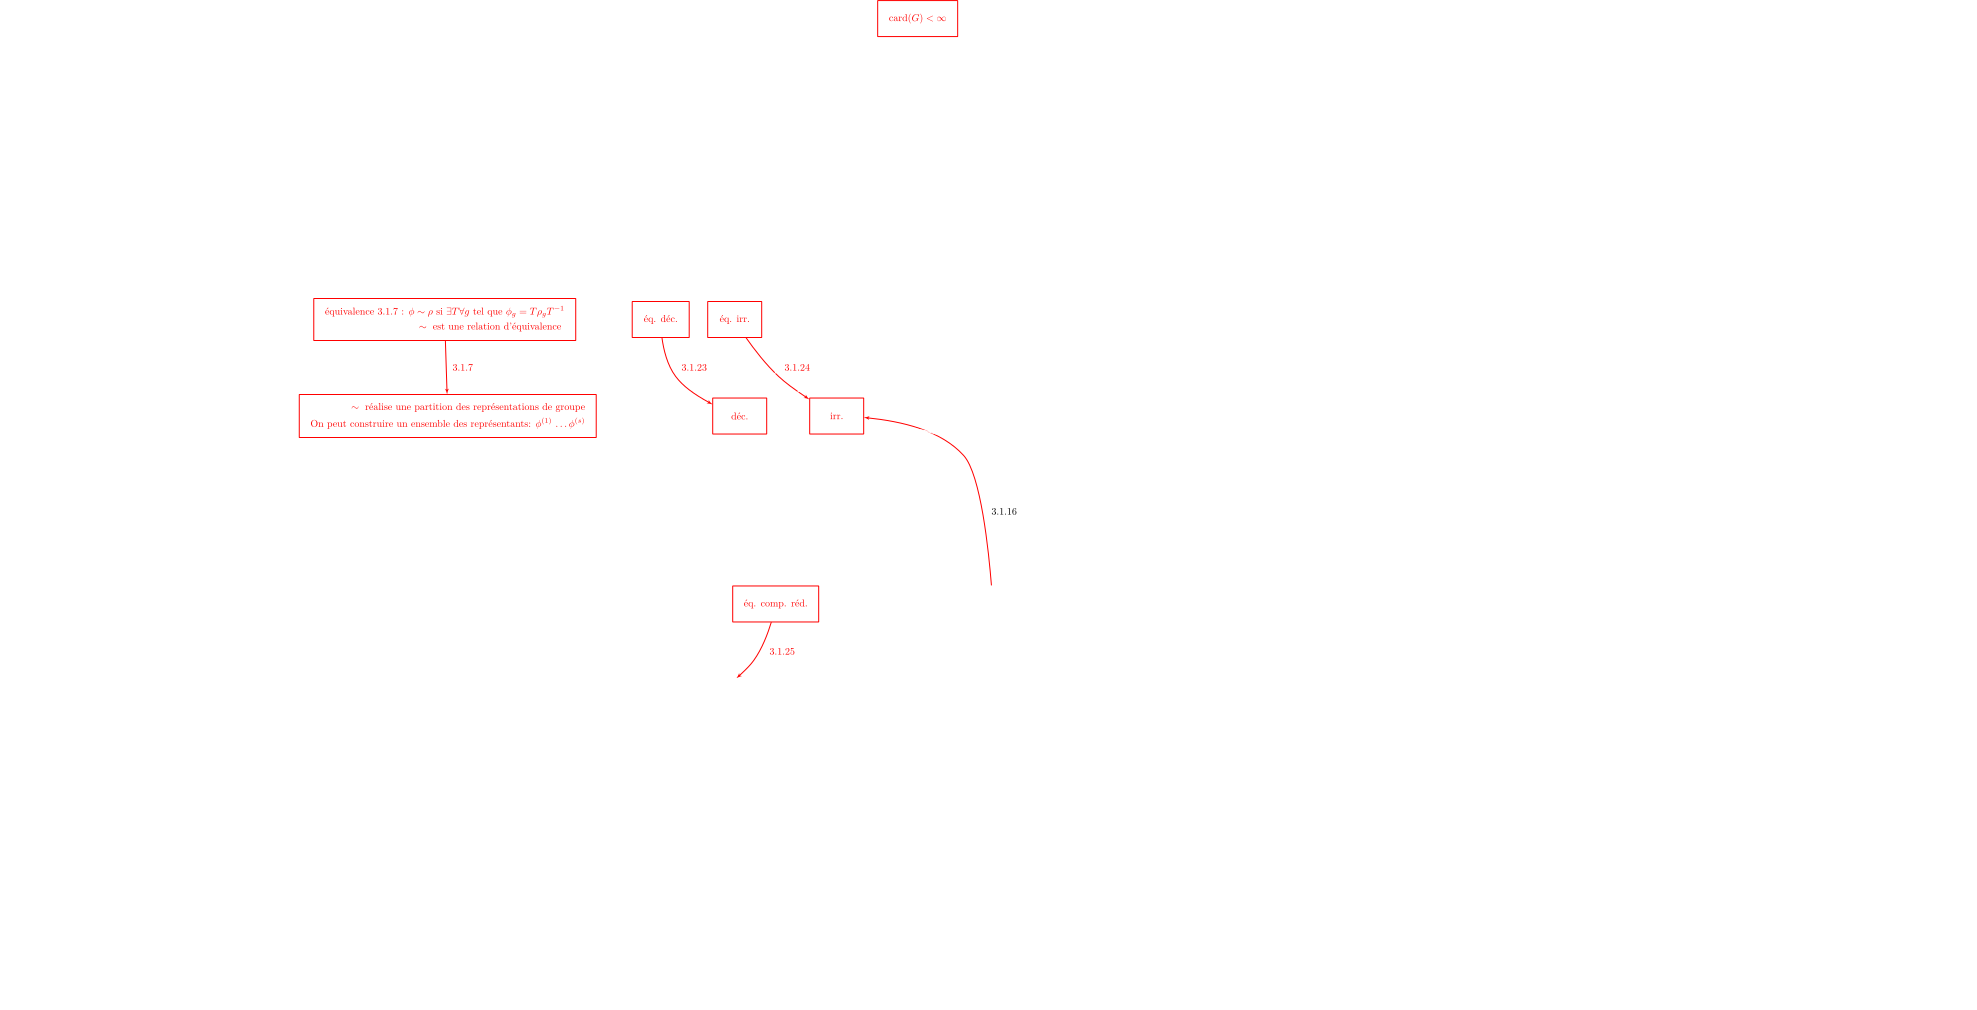

/usr/local/lib/python3.10/dist-packages/graph_csv_to_svg/csv_to_svg_c.py:264: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  B['shape'].fillna("rectangle", inplace=True)
/usr/local/lib/python3.10/dist-packages/graph_csv_to_svg/csv_to_svg_c.py:265: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

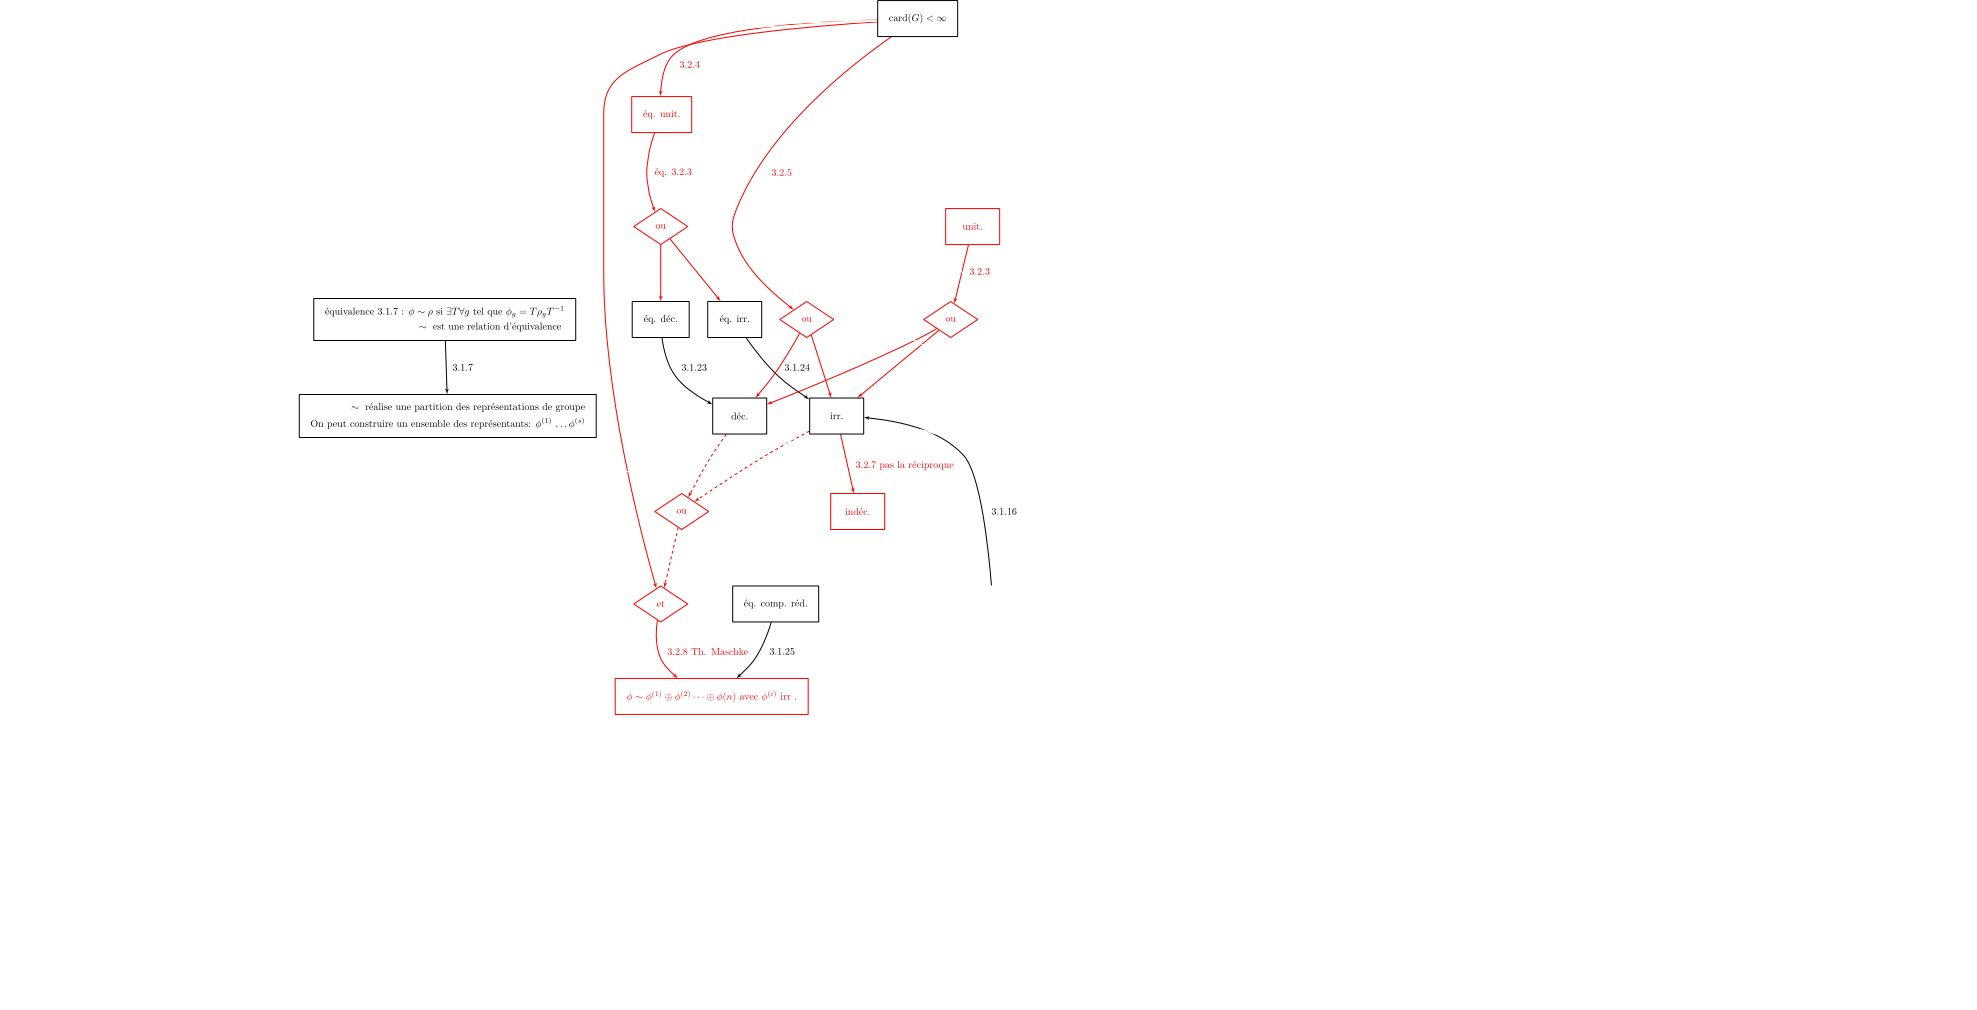

/usr/local/lib/python3.10/dist-packages/graph_csv_to_svg/csv_to_svg_c.py:264: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  B['shape'].fillna("rectangle", inplace=True)
/usr/local/lib/python3.10/dist-packages/graph_csv_to_svg/csv_to_svg_c.py:265: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

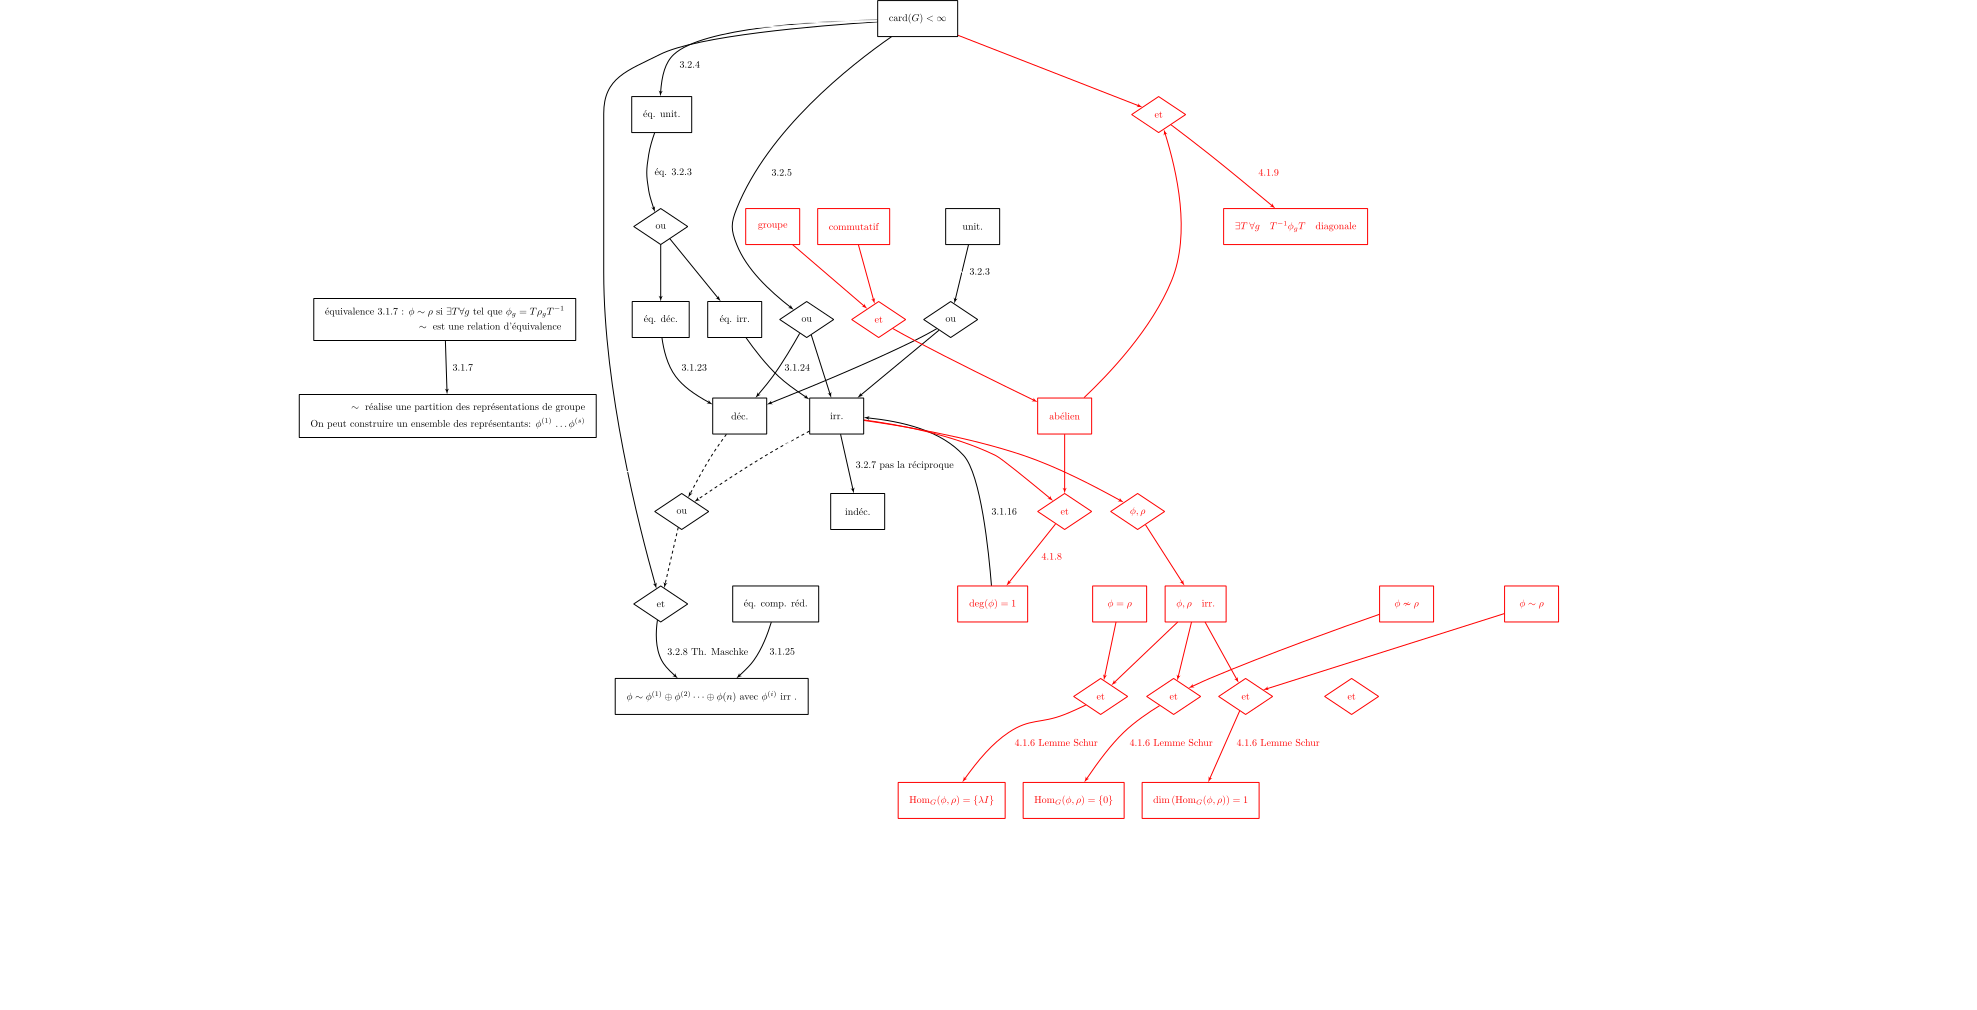

/usr/local/lib/python3.10/dist-packages/graph_csv_to_svg/csv_to_svg_c.py:264: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  B['shape'].fillna("rectangle", inplace=True)
/usr/local/lib/python3.10/dist-packages/graph_csv_to_svg/csv_to_svg_c.py:265: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

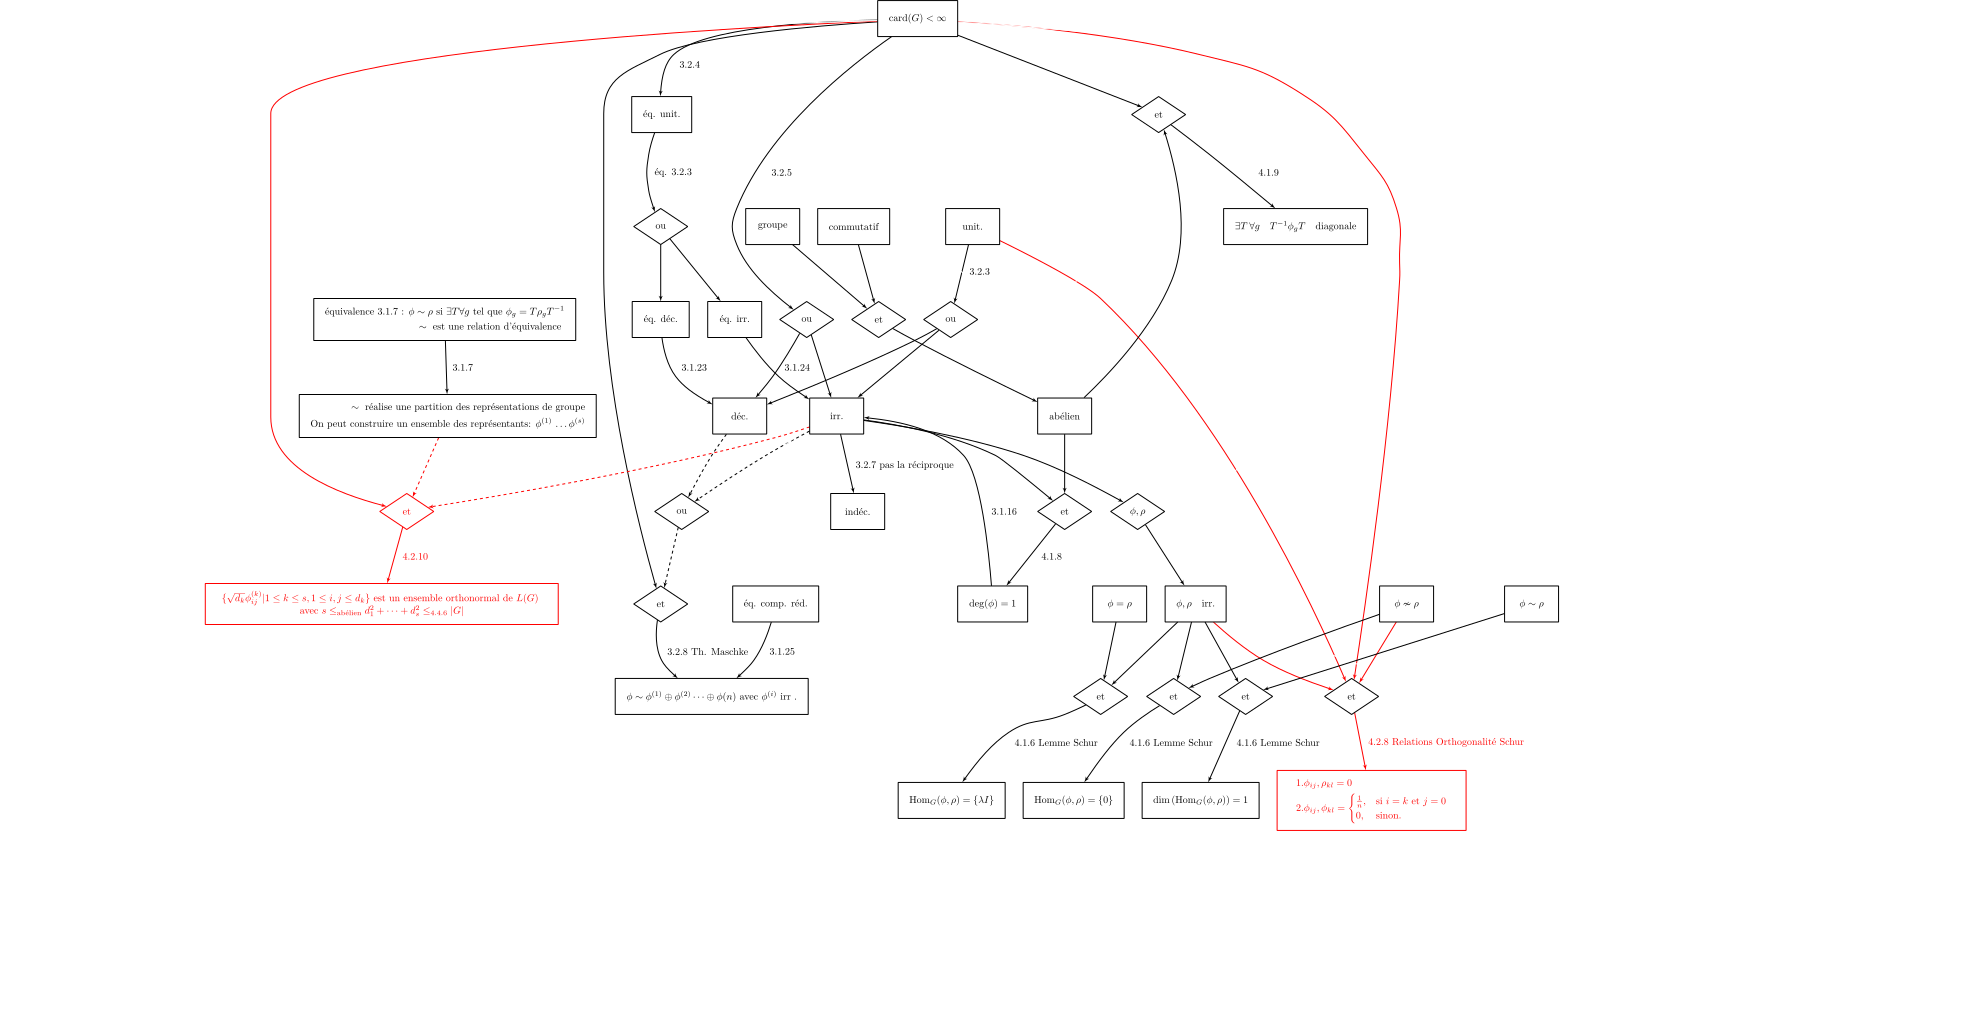

/usr/local/lib/python3.10/dist-packages/graph_csv_to_svg/csv_to_svg_c.py:264: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  B['shape'].fillna("rectangle", inplace=True)
/usr/local/lib/python3.10/dist-packages/graph_csv_to_svg/csv_to_svg_c.py:265: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

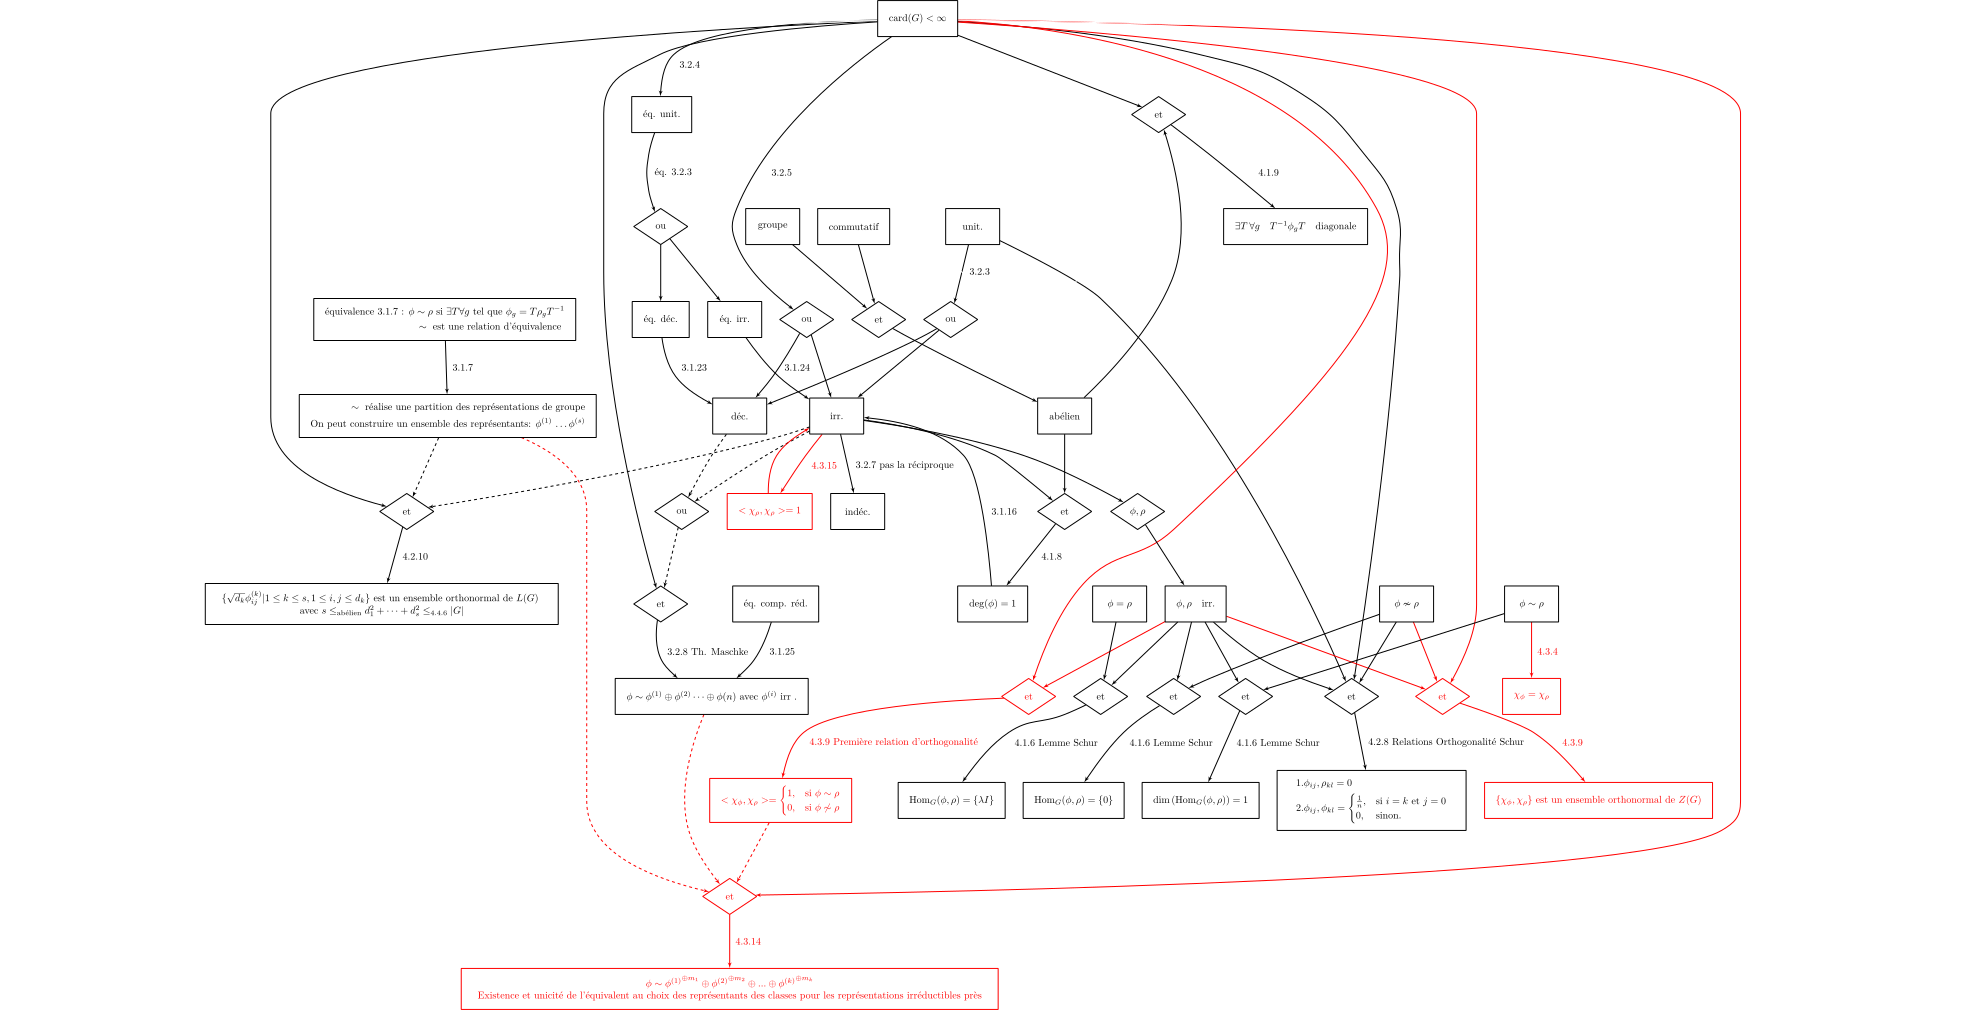

/usr/local/lib/python3.10/dist-packages/graph_csv_to_svg/csv_to_svg_c.py:264: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  B['shape'].fillna("rectangle", inplace=True)
/usr/local/lib/python3.10/dist-packages/graph_csv_to_svg/csv_to_svg_c.py:265: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

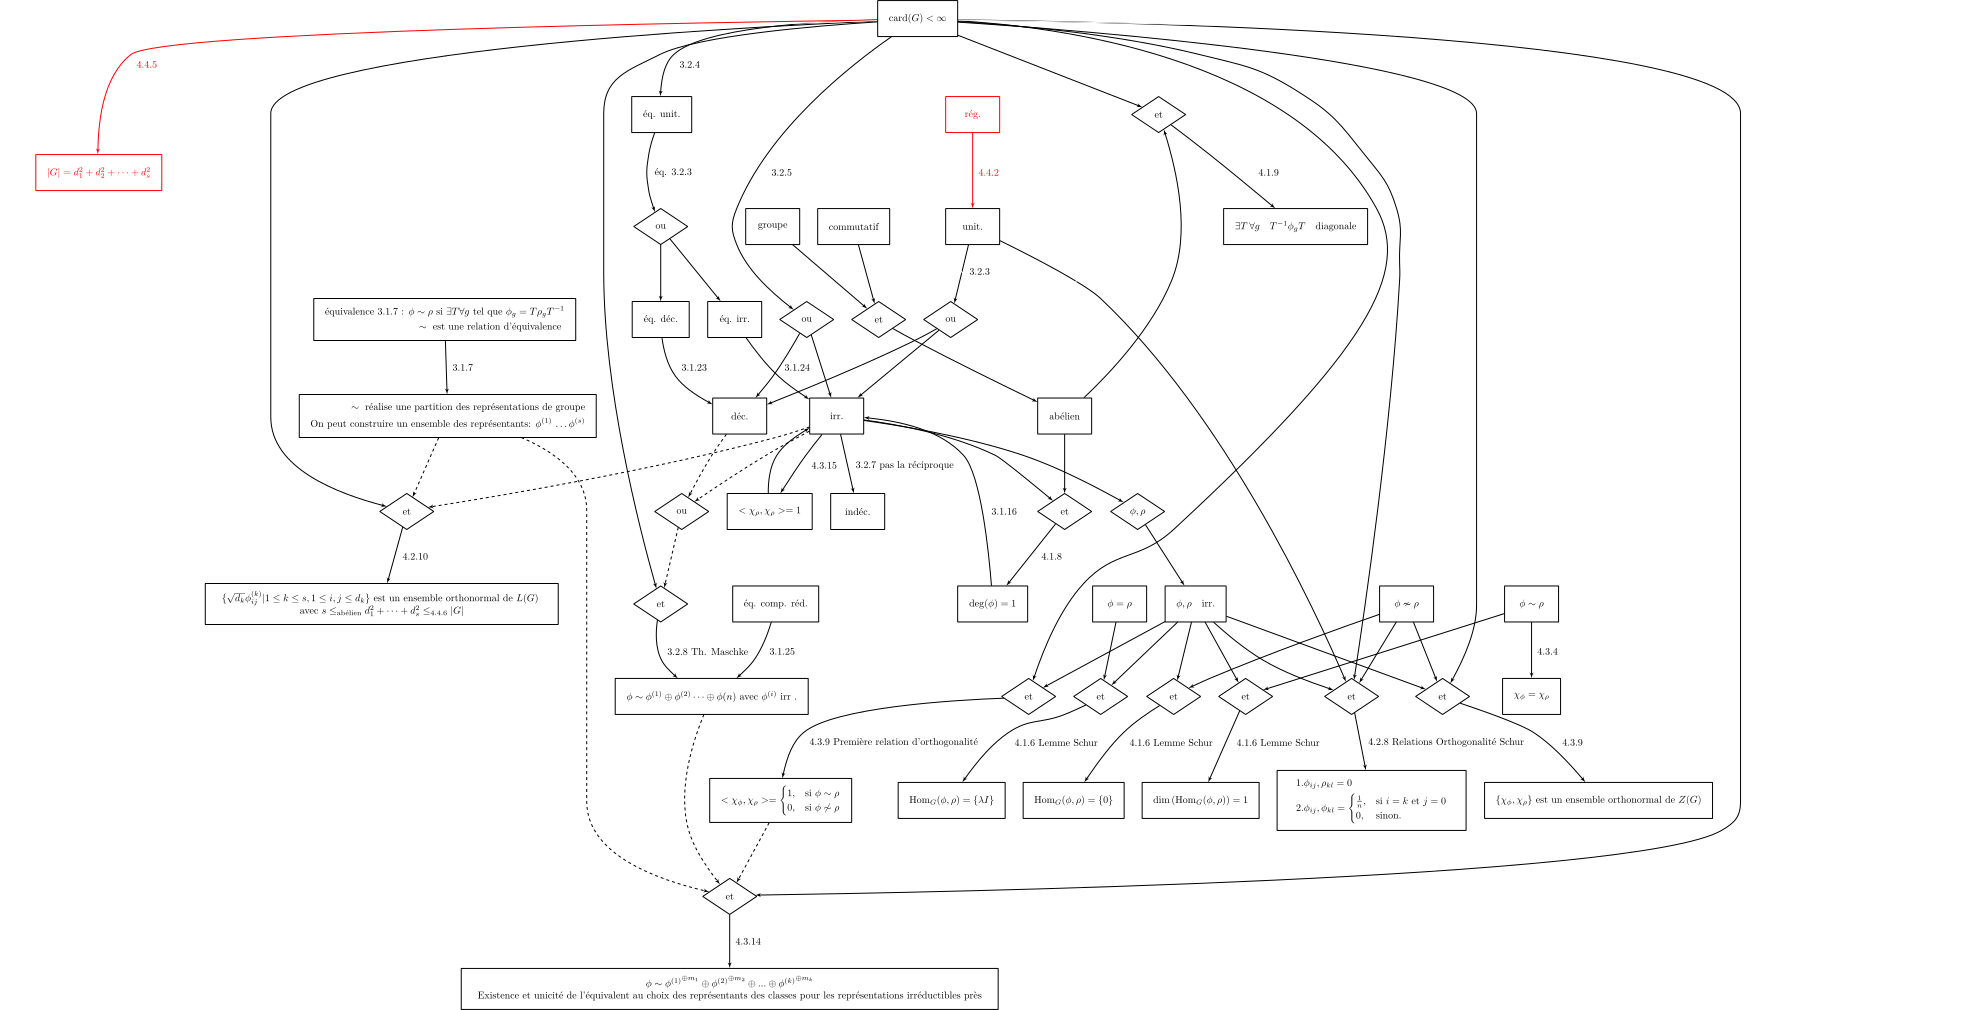

In [ ]:
for i in range(7):
  #replacements={'week1':"white",'week2':"blue",'week3':"pink",'week4':"brown",'week5':"yellow",'week6':"orange",'week7':"red"}
  #print(dict_col_list[0])
  week=i
  id=week-1
  csv_data_col=replace_csv_placeholders(csv_data,dict_col_list_edge[id])
  csv_node_col=replace_csv_placeholders(csv_node,dict_col_list[id])
  #print(csv_data)
  #print(dict_col_list[1])
  #csv_data_col

  Grep=csv_to_svg(csv_data_col,csv_node_col,"week"+str(i))

Imprimer en A3 et noter les différentes étapes. faire une construction progressive en plusieurs svg par presentation en mettant les semaines passées en gris.

## Théorème de représentation des groupes abéliens finis

###Lemme de $\mathrm{dim}(L(G))=|G|$

Nous allons utiliser des fonctions indicatrices de manière similaire à la démonstration de $\mathrm{dim}(Z(L(G))=\vert \mathrm{Cl}(G) \vert $ sauf que nous allons utiliser les éléments du groupe comme références pour les fonctions au lieu des classes de conjugaison.

 $ \forall g \in G$, on définit la fonction $\delta_g : G \to \mathbb{C}$ par :$$
\delta_g(h) = \begin{cases}
1, & \text{si } h = g \\
0, & \text{si } h \neq g
\end{cases}
$$

1. $\forall f\in L(G)$, on vérifie que:
$$f=\sum_{g\in G} f(g) \delta_g$$ En effet, $$\forall h \quad f(h)=\sum_{g\in G} f(g) \delta_g(h)=f(h)\delta_g(h)=f(h)$$ , car dans la somme,
tous les termes  $\delta_g(h)$ pour $g \neq h$ sont nuls. Donc $\{\delta_g\}$ génère $L(G)$.

2. Vérifions que $\{\delta_g\}$ est un ensemble orthogonal :  $\forall h, h' \in G$, alors $$\frac{1}{|G|} \sum_{g \in G} \delta_h(g) \overline{\delta_{h'}(g)} = \begin{cases} \frac{1}{|G|} , & \text{si } h=h' \\
0, & \text{si } h \neq h'
\end{cases}
$$.

Sachant 1. et 2., $\{\delta_g | g \in G\}$ est une base de $L(G)$ et $$\mathrm{card}(\{\delta_g\})=\mathrm{card}(G)=\mathrm{dim}(L(G))$$

###Lemme des représentations irréductibles de même traces

Par les premières relations d'orthogonalité pour les représentations irréductibles, on a l'équivalence: \
$$\require{color}
\newcommand{\doubleequivl}
{\mathrel{\overset{\text{irr}}{\mathrel{\overset{\color{red}\Longleftarrow}{\Longrightarrow}}}}}\phi \sim \rho \doubleequivl \chi_{\phi} = \chi_{\rho}$$

###Lemme des classes singletons en degré 1###


Si $\mathrm{deg}(\phi)=1$ alors $\phi$ est irréductible, $\chi_{\phi} = \phi$ et on a les équivalences, \
$$
\require{color}
\newcommand{\doubleequivl}
{\mathrel{\overset{\text{irr}}{\mathrel{\overset{\color{red}\Longleftarrow}{\Longrightarrow}}}}}\newcommand{\doubleequivr}
{\mathrel{\overset{\mathrm{deg}=1}{\mathrel{\overset{\color{red}\Longrightarrow}{\Longleftarrow}}}}}
 \phi \sim \rho \doubleequivl \chi_{\phi} = \chi_{\rho} \doubleequivr \phi = \rho $$

###Théorème 4.4.6: B.O.N. de $L(G)$

L'ensemble $$B=\{\sqrt{d_k}\phi_{ij}^{(k)} \vert 1 \leq k \leq s, 1 \leq i,j \leq d_k\}$$ est une base orthonormée de $L(G)$.

<u>**Démonstration**</u>

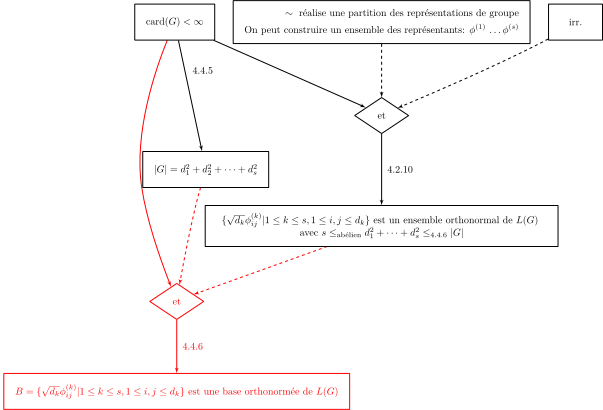

In [ ]:
_=G_E(Grep,{"orthosetLG"},2,2)

Il suffit de prouver que : $$ |B|=\mathrm{dim}(L(G))$$
On énumère le nombre d'éléments dans $B$ (distincts car $B$ est un ensemble orthonormal):
$$\vert B \vert =d_1^2+d_2^2+\cdots+d_s^2 $$
Selon 4.4.5,
$$\vert G \vert =d_1^2+d_2^2+\cdots+d_s^2 $$Donc,$$\vert B \vert = \vert G \vert $$
D'après le lemme sur la dimension de $L(G)$:
$$
\mathrm{dim}(L(G))=|G|$$Finalememt,$$ |B| = \mathrm{dim}(L(G))$$

###Théorème 4.4.7: B.O.N. de $Z(G)$

L'ensemble $\chi_1,\chi_2,\cdots,\chi_s$ est une base orthonormale de $Z(G)$.

<u>**Démonstration:**</u>

Rappel de notation : Fixons un ensemble complet $\{\varphi(1), \dots, \varphi(s)\}  $ de représentations unitaires irréductibles inéquivalentes de notre groupe fini $  G $, et notons $d_i = \deg \varphi(i) $. Pour simplifier, posons $ \chi_i = \chi_{\varphi(i)} $ pour $ i = 1, \dots, s $.

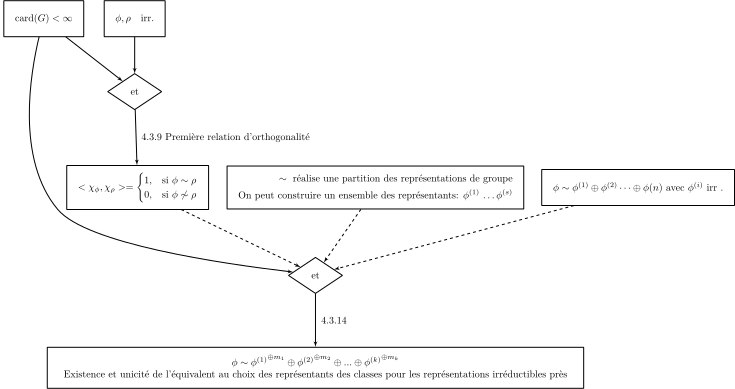

In [ ]:
_=G_E(Grep,{"premrelortho"},2,2)

Selon la première relation d'orthogonalité, les $\{\chi_i\}$ forment un ensemble orthonormal. Il nous reste à prouver qu'ils génèrent $Z(L(G))$. $\forall f \in Z(L(G)) , \quad \forall x \in G$, en décomposant sur la base orthonormée trouvée précédemment:
$$\begin{align}
f(x)&=\frac{1}{|G|}\sum_{g\in G} f(g^{-1}xg)&\cdot_{\text{class}}:L(G) \to Z(G) \text{ et } f \in Z(G) \text{ donc } f_{\text{classe}} = f\\& = \frac{1}{|G|} \sum_{g \in G} \sum_{i,j,k} c_{ij}^{(k)} \phi_{ij}^{(k)}(g^{-1}xg)& \text{décomposition sur B.O.N.}\\&  = \sum_{i,j,k} c_{ij}^{(k)} \left[ \frac{1}{|G|} \sum_{g \in G} \phi_{ij}^{(k)}(g^{-1}xg) \right]& \text{on permute les deux signes somme} \\& = \sum_{i,j,k} c_{ij}^{(k)} \left[ \frac{1}{|G|} \sum_{g \in G} \phi^{(k)}_{g^{-1}} \phi^{(k)}_x \phi^{(k)}_g \right]_{ij}& \phi^{k} \text{ est un morphisme }\\& = \sum_{i,j,k} c_{ij}^{(k)} \left[\left(\phi^{(k)}_x\right)^\#\right]_{ij}& \text{Formule 4.2.2 (a) avec } T =\phi_x^{(k)} \\& = \sum_{i,j,k} c_{ij}^{(k)} \frac{Tr(\phi^{(k)}x)}{\deg \phi^{(k)}} \delta{i,j}& \text{Formule 4.2.3 (b) avec } \phi = \rho\\& = \sum_{i,k} c_{i}^{(k)} \frac{1}{d_k} \chi^{(k)}(x)& \text{ formule de } \chi_k(x)
\end{align}$$

Les $\chi^{(k)} $ engendrent bien $Z(L(G))$ donc en considérant la dimension, on a bien une base.

###Corollaire 4.4.8 $|\mathrm{Hom}_{irr}(G,V)/\sim|=|G/\sim|$

Par construction des $\chi_k$:
$$s=|\mathrm{Hom}_{irr}(G,V)/\sim|$$
D'après le théorème précédent:
$$s=\mathrm{dim}(Z(L(G))$$
D'après 4.3.8 (les $\delta_C$ forment aussi une B.O.N.):
$$\mathrm{dim}(Z(L(G))=|G/\sim|$$

###Corollaire 4.4.9 G.A.F. $\iff |G|=|\mathrm{Hom}_{irr}(G,V)/\sim|$

Groupe abélien fini$ \iff |G|=|G/\sim|$\
Il suffit d'appliquer 4.4.8 .

###Exemple 4.4.10 $\mathrm{Hom}_{irr}(\mathbb{Z}/n\mathbb{Z},\mathbb{C}^*)=\{e^{\frac{2\pi i k \,\cdot}{n}}\}_{⟦0,n-1⟧}$

Définissons $\forall [m] :$
$$\chi_k([m])=e^{\frac{2\pi i k m}{n}}$$
Comme $\chi_k([m+p])=\chi_k([m])\chi_k([p])$,
on a bien un homomorphisme et $\chi_k([m]) \in \mathbb{C}^*$. \
$\deg (\chi_k)=1$ donc les $\chi_k$ sont irréductibles. \

Si $\chi_k([m])=\chi_l([m])$ alors: \
$$
e^{\frac{2\pi i k m}{n}}=e^{\frac{2\pi i l m}{n}}$$

$$\frac{2\pi  k m}{n}=\frac{2\pi l m}{n}+2j \pi \text{ avec } j \in \mathbb{Z}$$
$$(k-l)m=jn$$
Si $j=0$ , en prenant $m=1$ $k-l=0$. \
Si $j \neq 0$, on a $n|(k-l)m$ et en prenant $m=n-1$, on a $pgcd(m,n)=1$, on peut appliquer le lemme de Gauss et donc $ n|k-l $ .
Comme $|k-l|\leq n-1$, on a bien $k-l=0$. \
Ils sont tous distincts, au nombre de $n$ et $\mathbb{Z}/n\mathbb{Z}$ est abélien fini donc ce sont **les** représentations irréductibles de $\mathbb{Z}/n\mathbb{Z}$.

In [ ]:

n = 4
result = create_array_ZnZ(n)
latex_table=array_to_latex_with_bold(result)

display(Markdown(f"$${latex_table}$$"))

$$\begin{array}{|c|c|c|c|c|}
\hline
\mathbf{ } & \mathbf{[0]} & \mathbf{[1]} & \mathbf{[2]} & \mathbf{[3]} \\
\hline
\mathbf{\chi_0} & (1+0j) & (1+0j) & (1+0j) & (1+0j) \\
\hline
\mathbf{\chi_1} & (1+0j) & 1j & (-1+0j) & (-0-1j) \\
\hline
\mathbf{\chi_2} & (1+0j) & (-1+0j) & (1-0j) & (-1+0j) \\
\hline
\mathbf{\chi_3} & (1+0j) & (-0-1j) & (-1+0j) & 1j \\
\hline
\end{array}$$

#**Typo dans Steinberg, \chi_2 permute avec \chi_3** ???

In [ ]:
# Example usage:
n = 2
result = create_array_ZnZ(n)
latex_table=array_to_latex_with_bold(result)

display(Markdown(f"$${latex_table}$$"))

$$\begin{array}{|c|c|c|}
\hline
\mathbf{ } & \mathbf{[0]} & \mathbf{[1]} \\
\hline
\mathbf{\chi_0} & (1+0j) & (1+0j) \\
\hline
\mathbf{\chi_1} & (1+0j) & (-1+0j) \\
\hline
\end{array}$$

In [ ]:
# Example usage:
n = 8
result = create_array_ZnZ(n)
latex_table=array_to_latex_with_bold(result)

display(Markdown(f"$${latex_table}$$"))

$$\begin{array}{|c|c|c|c|c|c|c|c|c|}
\hline
\mathbf{ } & \mathbf{[0]} & \mathbf{[1]} & \mathbf{[2]} & \mathbf{[3]} & \mathbf{[4]} & \mathbf{[5]} & \mathbf{[6]} & \mathbf{[7]} \\
\hline
\mathbf{\chi_0} & (1+0j) & (1+0j) & (1+0j) & (1+0j) & (1+0j) & (1+0j) & (1+0j) & (1+0j) \\
\hline
\mathbf{\chi_1} & (1+0j) & (1+1j) & 1j & (-1+1j) & (-1+0j) & (-1-1j) & (-0-1j) & (1-1j) \\
\hline
\mathbf{\chi_2} & (1+0j) & 1j & (-1+0j) & (-0-1j) & (1-0j) & 1j & (-1+0j) & (-0-1j) \\
\hline
\mathbf{\chi_3} & (1+0j) & (-1+1j) & (-0-1j) & (1+1j) & (-1+0j) & (1-1j) & 1j & (-1-1j) \\
\hline
\mathbf{\chi_4} & (1+0j) & (-1+0j) & (1-0j) & (-1+0j) & (1-0j) & (-1+0j) & (1-0j) & (-1+0j) \\
\hline
\mathbf{\chi_5} & (1+0j) & (-1-1j) & 1j & (1-1j) & (-1+0j) & (1+1j) & (-0-1j) & (-1+1j) \\
\hline
\mathbf{\chi_6} & (1+0j) & (-0-1j) & (-1+0j) & 1j & (1-0j) & (-0-1j) & (-1+0j) & (-0+1j) \\
\hline
\mathbf{\chi_7} & (1+0j) & (1-1j) & (-0-1j) & (-1-1j) & (-1+0j) & (-1+1j) & (-0+1j) & (1+1j) \\
\hline
\end{array}$$

###Théorème 4.4.13 Seconde relation d'orthogonalité

Soient $  C $ et $ C' $ des classes de conjugaison de $G $, et soient $g \in C $ et $ h \in C'$. Alors :  

$$
\sum_{i=1}^s \chi_i(g) \overline{\chi_i(h)} =
\begin{cases}
\frac{|G|}{|C|} & \text{si } C = C', \\
0 & \text{si } C \neq C'.
\end{cases}
$$

En conséquence, les colonnes de la table des caractères sont orthogonales, ce qui rend la table des caractères inversible.

**<u>Démonstration:</u>**

Nous calculons :

$$\begin{align}\delta_{C'}(g) &= \sum_{i=1}^s ⟨\delta_{C'}, \chi_i⟩\chi_i(g)  &\text{ décomposition sur la B.O.N. des } \delta_C \\ &= \sum_{i=1}^s \frac{1}{|G|} \sum_{x \in G} \delta_{C'}(x) \overline{\chi_i(x)} \chi_i(g) &\text{écriture du produit scalaire} \\ &= \sum_{i=1}^s \frac{1}{|G|} \sum_{x \in C'} \overline{\chi_i(x)} \chi_i(g) &\delta_{C'} \text{passe dans les indices de } \sum \\ &= \frac{|C'|}{|G|} \sum_{i=1}^s \chi_i(g) \overline{ \chi_i(h)} &\chi_i \in Z(L(G)) \end{align}$$

Puisque le membre de gauche vaut 1 lorsque $g \in C'$ et 0 sinon, nous concluons que

$$\sum_{i=1}^s \overline{\chi_i(h)} \chi_i(g) = \begin{cases}
\frac{|G|}{|C'|} & \text{si } C = C' \\
0 & \text{si } C \neq C'
\end{cases}$$

comme requis.

###Remarque 4.4.13 matrice de passage $\{\chi_i\} \to \{\delta_C\}$

La matrice de passage a, par définition, comme colonne les vecteurs de la nouvelle base dans les coordonnées de l'ancienne base. \

En appliquant la dernière formule trouvée avec $h \in C'$: $$\delta_{C'}(\cdot)=\frac{|C'|}{|G|} \sum_{i=1}^s \chi_i(\cdot) \overline{ \chi_i(h)}$$

Donc les coefficients de $P={p_{i,j}}$ sont $$p_{i,j}=\frac{|C_j|}{|G|} \overline{ \chi_i(C_j)}$$
Les coefficients du tableau de caractère sont : $$\chi_i(C_j)$$

###Propriété 4.5.1 produit cartésien et produit de caractère

(4.5.1) \
Soit $G_1$,$G_2$ des groupes abéliens. \
$\chi_1,\dots,\chi_m$ et $\phi_1,\dots,\phi_n$ sont les représentations irréductibles de $G_1$ et $G_2$, respectivement. \
En particulier, $m=|G_1|$ et $n=|G_2|$. \
Alors les fonctions $\alpha_{ij} : G_1 \times G_2 \rightarrow \mathbb{C}^*$ avec $1\leq i\leq m$ et $1\leq j \leq n$ donnée par: \
$$ \tag{1} \alpha_{ij}(g_1,g_2)=\chi_i(g_1)\phi_j(g_2)$$
forment un ensemble complet de représentations irréductibles de $G_1 \times G_2$.

<u>**Démonstration**</u>

1. *$\chi_1,\dots,\chi_m$ et $\phi_1,\dots,\phi_n$ sont les représentations irréductibles de $G_1$ et $G_2$, respectivement. En particulier, $m=|G_1|$ et $n=|G_2|$. \*

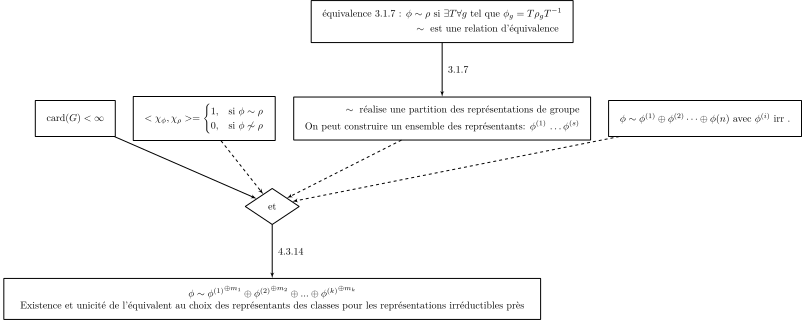

In [ ]:
_=G_E(Grep,{'unique_dec'},1,0,({'classe_eq'},1,0),({'comp_red'},0,2))

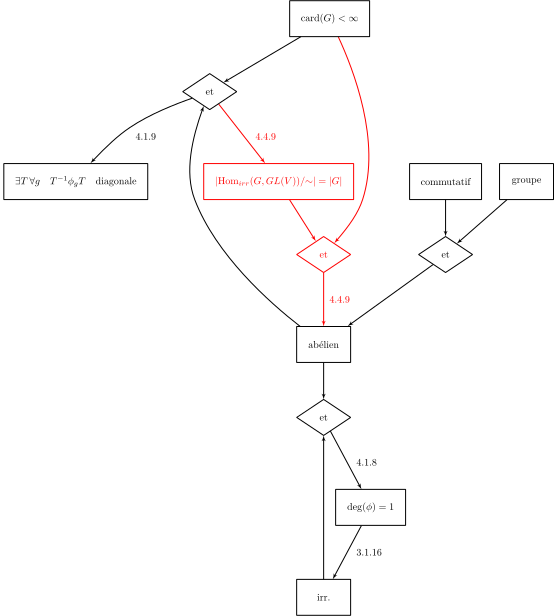

In [ ]:
_=G_E(Grep,{"abelien"},2,2)

Par le lemme des classes singletons, ce sont les seuls. En effet, la représentation triviale (3.1.3)  appartient à  $\mathrm{Hom}_{irr}(G,\mathbb{C}^*)$. Donc cet ensemble est non vide. Prenons $\sim$ pour réaliser une partition de $\mathrm{Hom}_{irr}(G,\mathbb{C}^*)$. Soit $\rho$ une représentation irréductible. Donc $\rho$ appartient forcément à une des classes d'équivalence (disons la $i$). En utilisant le lemme: \
 $$\rho \sim \chi_i  \implies \chi_{\rho} = \chi_i \iff \rho=\phi^{(i)}$$
On a bien existence et unicité de l'ensemble des représentants.

3. $\alpha_{ij} \in \mathrm{Hom}_{irr}(G_1 \times G_2 ,\mathbb{C}^*)$



Le produit cartésien est muni d'une loi de composition interne $•_{G_1 \times G_2} $ : \
$(g_1, g_1^\prime) •_{G_1 \times G_2} (g_2, g_2^\prime) = (g_1 •_{G_1} g_2\,\, , \,\, g_1^\prime •_{G_2} g_2^\prime)$ \

$\forall (g_1,g_2) \in G_1 \times G_2 $ et $\forall (g_1^\prime,g_2^\prime) \in G_1 \times G_2$ : \
$
\begin{align*}
\alpha_{ij}(g_1,g_2)\alpha_{ij}(g_1^\prime,g_2^\prime) &= \chi_i(g_1)\phi_j(g_2)\chi_i(g_1^\prime)\phi_j(g_2^\prime)  \\
&= \chi_i(g_1)\chi_i(g_1^\prime)\phi_j(g_2)\phi_j(g_2^\prime) \\
&= \chi_i(g_1g_1^\prime)\phi_j(g_2g_2^\prime) \\
&= \alpha_{ij}(g_1g_1^\prime,g_2g_2^\prime) \\
&= \alpha_{ij}((g_1,g_2)(g_1^\prime,g_2^\prime))
\end{align*}
$

$\mathrm{deg}(\alpha_{ij})=1$ donc d'après 3.1.16, $\alpha_{ij}$ est irréductible.

4. Les $\alpha_{ij}$ sont distincts:


Si $\alpha_{ij}=\alpha_{kl}$, sachant que $\forall m \,\, \chi_m(1)=\phi_m(1)=1$ selon 4.3.3 et en prenant $\forall g \in G_1$: \

$\chi_i(g)=\chi_i(g)\phi_j(1)=\alpha_{ij}(g,1)=\alpha_{kl}(g,1)=\chi_k(g)\phi_l(1)=\chi_k(g)$ \

Donc $\chi_i=\chi_k$, et comme les $\chi$ sont distincts, $i=k$. \

Même raisonnement avec $\phi_j=\phi_l$ en prenant $(1,g)$. \

5. Égalité des ensembles


$\vert G_1 \times G_2 \vert = mn$ donc $G_1 \times G_2 $ a $mn$ classes d'équivalence de représentations irréductibles selon 4.4.9 . \

$\mathrm{card}({\alpha_{ij}})=mn$ par construction et car les $\alpha_{ij}$ sont distincts. \

$\alpha_{ij} \subseteq  \mathrm{Hom}_{irr}(G_1 \times G_2 ,\mathbb{C}^*) $ \

Par le lemme des classes singletons, chaque $\alpha_{ij}$ est l'unique représentant de sa classe. \

Donc les $\alpha_{ij}$ forment **l'ensemble** complet des représentations irréductibles.

###Exemple 4.5.2 :

In [ ]:
perm = [1, 0, 2, 3]  # Permutation des indices
matrice = matrice_permutation(perm)
print(matrice)

[[0 1 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]]


####Groupe de Klein

In [ ]:

import numpy as np

def groupe_klein():
    """
    Définit explicitement les éléments du groupe de Klein.

    Returns:
    list: Liste des 4 éléments du groupe
    """
    # Éléments du groupe de Klein






    e = np.array([[1, 0], [0, 1]])             # Identité
    a = np.array([[1, 0], [0, -1]])           # Réflexion horizontale
    b = np.array([[-1, 0], [0, 1]])          # Réflexion verticale
    c = np.array([[-1, 0], [0, -1]])          # Symétrie centrale

    return [e, a, b, c]
(e,a,b,c)=groupe_klein()
name=['e','a','b','c']
name=np.array(name)



def matrices_equal(m1, m2, tol=1e-8):
    """
    Compare deux matrices en tenant compte des erreurs de précision numérique.

    Args:
    m1, m2 (np.ndarray): Matrices à comparer.
    tol (float): Tolérance pour les différences.

    Returns:
    bool: True si les matrices sont égales, False sinon.
    """
    return np.allclose(m1, m2, atol=tol)




def table_multiplication(elements = groupe_klein(),name=name):
    """
    Génère la table de multiplication du groupe de Klein.
    """

    n = len(elements)
    table = np.zeros((n, n),dtype=str)


    for i in range(n):
        row = f" {i} |"
        for j in range(n):
            produit = np.dot(elements[i], elements[j])
            test=[matrices_equal(produit,elements[k]) for k in range(len(elements))]
            table[i, j] = name[test][0]


    table=np.array(table)
    table=np.vstack((name,table))
    table=np.hstack((np.transpose(np.concatenate((['\\ast'],name))).reshape(5, 1),table))
    return table

# Générer et afficher la table de multiplication
table = table_multiplication()
latex_table = array_to_latex_with_bold(table)
display(Markdown("Représentation du groupe $D_4$ dans $GL(\mathbb{R}^2)$:"))
display(Markdown(f"e : ${array_to_latex(e)}$ $\quad$  a : ${array_to_latex(a)}$ "))
display(Markdown(f"b:  ${array_to_latex(b)}$   $\quad$   c: ${array_to_latex(c)}$"))
display(Markdown("Table de Caley de $D_4$:"))
display(Markdown(f"$${latex_table}$$"))

Représentation du groupe $D_4$ dans $GL(\mathbb{R}^2)$:

e : $\begin{array}{|c|c|}
\hline
1 & 0 \\
\hline
0 & 1 \\
\hline
\end{array}$ $\quad$  a : $\begin{array}{|c|c|}
\hline
1 & 0 \\
\hline
0 & -1 \\
\hline
\end{array}$ 

b:  $\begin{array}{|c|c|}
\hline
-1 & 0 \\
\hline
0 & 1 \\
\hline
\end{array}$   $\quad$   c: $\begin{array}{|c|c|}
\hline
-1 & 0 \\
\hline
0 & -1 \\
\hline
\end{array}$

Table de Caley de $D_4$:

$$\begin{array}{|c|c|c|c|c|}
\hline
\mathbf{\ast} & \mathbf{e} & \mathbf{a} & \mathbf{b} & \mathbf{c} \\
\hline
\mathbf{e} & e & a & b & c \\
\hline
\mathbf{a} & a & e & c & b \\
\hline
\mathbf{b} & b & c & e & a \\
\hline
\mathbf{c} & c & b & a & e \\
\hline
\end{array}$$

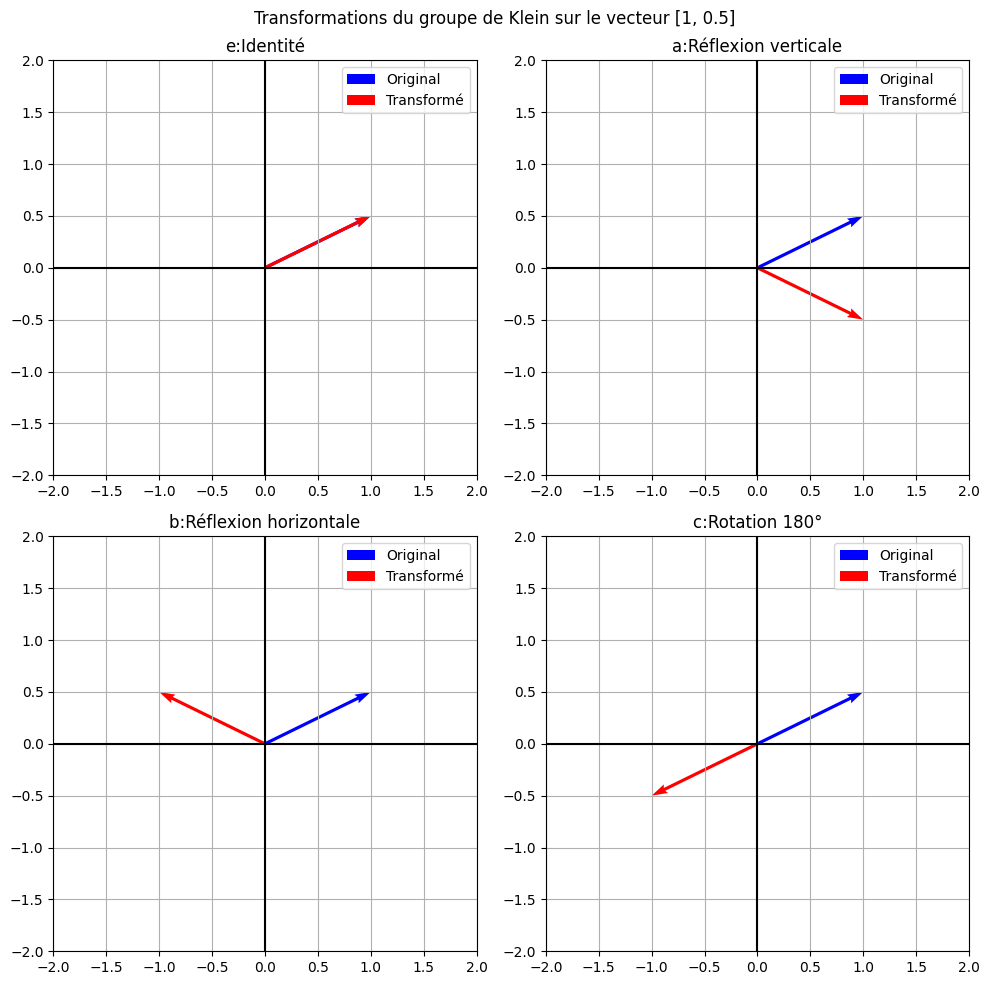

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Définition des matrices de transformation
e = np.array([[1, 0], [0, 1]])             # Identité
a = np.array([[1, 0], [0, -1]])            # Réflexion verticale
b = np.array([[-1, 0], [0, 1]])            # Réflexion horizontale
c = np.array([[-1, 0], [0, -1]])           # Rotation 180°

# Vecteur initial
v = np.array([1, 0.5])

# Créer une figure en mosaïque
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Transformations du groupe de Klein sur le vecteur [1, 0.5]')

# Liste des transformations et leurs noms
transformations = [
    (e, 'e:Identité'),
    (a, 'a:Réflexion verticale'),
    (b, 'b:Réflexion horizontale'),
    (c, 'c:Rotation 180°')
]

# Appliquer chaque transformation
for i, (mat, name) in enumerate(transformations):
    # Calculer la transformation
    transformed = mat @ v

    # Déterminer la position dans la grille
    row = i // 2
    col = i % 2

    # Tracer le vecteur original et transformé
    axs[row, col].quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original')
    axs[row, col].quiver(0, 0, transformed[0], transformed[1], angles='xy', scale_units='xy', scale=1, color='red', label='Transformé')

    axs[row, col].set_xlim(-2, 2)
    axs[row, col].set_ylim(-2, 2)
    axs[row, col].set_title(name)
    axs[row, col].grid(True)
    axs[row, col].axhline(y=0, color='k')
    axs[row, col].axvline(x=0, color='k')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

isométries laissant globalement invariant un rectangle (éventuellement réduit à un segment) : $D_4$

$$\mathbb{Z}/2\mathbb{Z} \times \mathbb{Z}/2\mathbb{Z}$$

In [ ]:


data = {
    "": ["\chi_1", "\chi_2"],
    "[0]": [1, 1 ],
    "[1]": [1, -1]
}
df = pd.DataFrame(data)
datachi= {    "": ["\chi_1", "\chi_2"],
    "[0]": ["\chi_1([0])", "\chi_2([0])"],
  "[1]": ["\chi_1([1])", "\chi_2([1])"]}
dfchi = pd.DataFrame(datachi)
latex_table = dataframe_to_latex_array(df)
latex_table_chi = dataframe_to_latex_array(dfchi)

# Display LaTeX code in Markdown
display(Markdown("Tableau des caractères"))
display(Markdown(f"$${latex_table_chi}$$"))

# Display LaTeX code in Markdown
display(Markdown("Tableau des caractères de $\mathbb{Z}/2\mathbb{Z}$"))
display(Markdown(f"$${latex_table}$$"))

Tableau des caractères

$$\begin{array}{|l|c|c|}
\hline
 & [0] & [1] \\
\hline
\chi_1 & \chi_1([0]) & \chi_1([1]) \\
\hline
\chi_2 & \chi_2([0]) & \chi_2([1]) \\
\hline
\end{array}$$

Tableau des caractères de $\mathbb{Z}/2\mathbb{Z}$

$$\begin{array}{|l|c|c|}
\hline
 & [0] & [1] \\
\hline
\chi_1 & 1 & 1 \\
\hline
\chi_2 & 1 & -1 \\
\hline
\end{array}$$

In [ ]:
data = {
    "": ["\\alpha_{11}", "\\alpha_{12}", "\\alpha_{21}", "\\alpha_{22}"],
    "([0],[0])": [1, 1,1,1 ],
    "([0],[1])":  [1, -1,1,-1],
    "([1],[0])": [1,1,-1 ,-1],
    "([1],[1])": [1,-1,-1,1]
}
df = pd.DataFrame(data)

latex_table = dataframe_to_latex_array(df)
npchi2 = dfchi.to_numpy()
#display(npchi2)

def string_kronecker_product(arr1, arr2):
    """
    Perform a Kronecker product-like operation on string arrays
    by concatenating elements
    """
    result = np.empty((arr1.shape[0] * arr2.shape[0],
                       arr1.shape[1] * arr2.shape[1]),
                      dtype=object)

    for i in range(arr1.shape[0]):
        for j in range(arr1.shape[1]):
            for k in range(arr2.shape[0]):
                for l in range(arr2.shape[1]):
                    result[i*arr2.shape[0] + k, j*arr2.shape[1] + l] = \
                        f"{arr1[i,j]}{arr2[k,l]}"

    return result

# Example usage:
npchi2 = np.array([[ '\\chi_1([0])', '\\chi_1([1])'],
                   [ '\\chi_2([0])', '\\chi_2([1])']], dtype=object)

npchi2_red= np.array([[ '\\textcolor{red}{\\chi_1([0])}', '\\textcolor{red}{\\chi_1([1])}'],
                   [ '\\textcolor{red}{\\chi_2([0])}', '\\textcolor{red}{\\chi_2([1])}']], dtype=object)


npchi4 = string_kronecker_product(npchi2_red, npchi2)

npchi4=np.vstack((['([0],[0])','([0],[1])','([1],[0])','([1],[1])'],npchi4))
npchi4=np.hstack((np.transpose(['','\\chi_1\\chi_1','\\chi_1\\chi_2','\\chi_2\\chi_1','\\chi_2\\chi_2']).reshape(5,1),npchi4))
ltxchi4=array_to_latex(npchi4)
display(Markdown("Tableau des caractères de $\mathbb{Z}/2\mathbb{Z} \\times \mathbb{Z}/2\mathbb{Z}$"))
display(Markdown(f"$${ltxchi4}$$"))# Display LaTeX code in Markdown
display(Markdown("Tableau des caractères de $\mathbb{Z}/2\mathbb{Z} \\times \mathbb{Z}/2\mathbb{Z}$"))
display(Markdown(f"$${latex_table}$$"))

Tableau des caractères de $\mathbb{Z}/2\mathbb{Z} \times \mathbb{Z}/2\mathbb{Z}$

$$\begin{array}{|c|c|c|c|c|}
\hline
 & ([0],[0]) & ([0],[1]) & ([1],[0]) & ([1],[1]) \\
\hline
\chi_1\chi_1 & \textcolor{red}{\chi_1([0])}\chi_1([0]) & \textcolor{red}{\chi_1([0])}\chi_1([1]) & \textcolor{red}{\chi_1([1])}\chi_1([0]) & \textcolor{red}{\chi_1([1])}\chi_1([1]) \\
\hline
\chi_1\chi_2 & \textcolor{red}{\chi_1([0])}\chi_2([0]) & \textcolor{red}{\chi_1([0])}\chi_2([1]) & \textcolor{red}{\chi_1([1])}\chi_2([0]) & \textcolor{red}{\chi_1([1])}\chi_2([1]) \\
\hline
\chi_2\chi_1 & \textcolor{red}{\chi_2([0])}\chi_1([0]) & \textcolor{red}{\chi_2([0])}\chi_1([1]) & \textcolor{red}{\chi_2([1])}\chi_1([0]) & \textcolor{red}{\chi_2([1])}\chi_1([1]) \\
\hline
\chi_2\chi_2 & \textcolor{red}{\chi_2([0])}\chi_2([0]) & \textcolor{red}{\chi_2([0])}\chi_2([1]) & \textcolor{red}{\chi_2([1])}\chi_2([0]) & \textcolor{red}{\chi_2([1])}\chi_2([1]) \\
\hline
\end{array}$$

Tableau des caractères de $\mathbb{Z}/2\mathbb{Z} \times \mathbb{Z}/2\mathbb{Z}$

$$\begin{array}{|l|c|c|c|c|}
\hline
 & ([0],[0]) & ([0],[1]) & ([1],[0]) & ([1],[1]) \\
\hline
\alpha_{11} & 1 & 1 & 1 & 1 \\
\hline
\alpha_{12} & 1 & -1 & 1 & -1 \\
\hline
\alpha_{21} & 1 & 1 & -1 & -1 \\
\hline
\alpha_{22} & 1 & -1 & -1 & 1 \\
\hline
\end{array}$$

## Applications

### Exercice 4.9

**<u>Énoncé :</u>**


Soit $\chi$ un caractère irréductible non trivial d'un groupe fini $G$.
Montrer que :
$$ \sum_{g \in G} \chi_{\rho}(g) = 0 $$

**<u>Résolution :</u>**

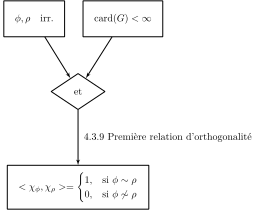

In [ ]:
_=G_E(Grep,{"premrelortho"},2,0)

$$⟨\chi_{\rho},\chi_{\text{trivial}}⟩=0$$
$$\frac{1}{|G|}\sum_{g\in G}\chi_\rho(g)\overline{\chi_{\text{trivial}}(g)}=0$$
Et comme $\forall g\,\,\, \chi_{\text{trivial}}(g)=1$,on a bien :
$$\sum_{g\in G}\chi_\rho(g)=0$$

### Exercice 4.7

**<u>Énoncé :</u>**


Soient $\phi: G \to \mathrm{GL}_n(\mathbb{C})$ et $\rho: G \to \mathrm{GL}_m(\mathbb{C})$ deux représentations.
Soit $V = M_{mn}(\mathbb{C})$.

Définissons $\tau: G \to \mathrm{GL}(V)$ par $\tau_g(A) = \rho_g A \phi_g^{T}$.

1.Montrer que $\tau$ est une représentation de $G$.

**<u>Résolution :</u>**

Nous devons vérifier que c'est un homomorphisme de groupe. $\forall A \in M_{mn}(\mathbb{C})$ et $\forall g,h \in G$ :

$$\tau_{gh}(A) = \rho_{gh} A \phi_{gh}^{T} = \rho_g(\rho_h A \phi_h^{T})\phi_g^{T} = \tau_g(\tau_h(A))$$
    
On en déduit aussi, comme pour tout homomorphisme :

$$\tau_e(A) = \rho_e A \phi_e^{T} = A$$
et
$$\tau_{g^{-1}}(A)=(\tau_{g}(A))^{-1}$$

**<u>Énoncé :</u>**


Soit $\tau$ la représentation définie précédemment. \
 2.Montrer que : $$\tau_g(E_{kl}) = \sum_{i,j} \rho_{ik}(g)\phi_{jl}(g)E_{ij}$$

**<u>Résolution :</u>**

Soit $E_{kl} = e_k (e_l)^{T}$, où $e_k$ et $e_l$ sont les vecteurs de la base canonique.
$$
\begin{align*}
\tau_g(E_{kl}) &= \rho_g E_{kl} \phi_g^{T} \\
&= \rho_g (e_k (e_l)^{T}) \phi_g^{T} \\
&= (\rho_g e_k) ((\phi_g e_l)^{T}) \\
&= \rho_{.,k}(g)  \phi_{.,l}(g)^{T}
 \\ &= (\rho_{i,k}(g) \phi_{j,l}(g))_{i,j}
 \\ &= \sum_{i,j} \rho_{i,k}(g) \phi_{j,l}(g) E_{i,j}
\end{align*}
$$
Où :\
$\rho_g e_k$ donne la $k$-ième colonne de $\rho_g$ \
  $\phi_g e_l$ donne le $l$-ième colonne de $\phi_g$ \
  Le produit matriciel extérieur (outer) de ces deux vecteurs reconstruit une matrice qui peut s'écrire sur la base $E_{ij}$ . \

**<u>Énoncé :</u>**

3.Prouver que $\chi_\tau(g) = \chi_\rho(g)\chi_\phi(g)$

**<u>Résolution :</u>**

Pour obtenir la trace, il faut calculer la somme des coefficients diagonaux. Pour $w: U \to U $, et $U$ a pour base $\{u_k\}_{1\leq k \leq mn}$, on a $w(u_i)=\sum_{k=1}^{mn} w_{k,i} u_k $ et la définition de la trace : $\mathrm{tr}(w)=\sum_{i=1}^{mn} (w(u_i))_i=\sum_{i=1}^{mn} w_{ii}$ .

On peux définir une bijection linéaire f entre une base de $U$ et celle de  $M_{m,n}(\mathbb{C})$.



Considérons une matrice $A \in M_{m,n}(\mathbb{C})$ :
$$
A =
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}.
$$

Après linéarisation colonne par colonne, chaque élément $a_{ij}$ est associé à un indice $k$ donné par la formule :
$$
k = (j-1)m + i.
$$

La correspondance est représentée ainsi :

$$
\begin{bmatrix}
1       & m+1     & \cdots & (n-1)m + 1 \\
2       & m+2     & \cdots & (n-1)m + 2 \\
\vdots  & \vdots  & \ddots & \vdots     \\
m       & 2m      & \cdots & nm
\end{bmatrix}.
$$
Grace à cette formule, on peut definir la bijection $\nu : \mathbb{N}^* \to \mathbb{N}^* \times \mathbb{N}^*$ tel que $\nu(k)=(i,j)$.

Exemple : pour $m = 3$ et $n = 4$, la matrice est donnée par :
$$
A =
\begin{bmatrix}
a_{11} & a_{12} & a_{13} & a_{14} \\
a_{21} & a_{22} & a_{23} & a_{24} \\
a_{31} & a_{32} & a_{33} & a_{34}
\end{bmatrix}.
$$

Les indices linéarisés sont :
$$
\begin{bmatrix}
1 & 4 & 7 & 10 \\
2 & 5 & 8 & 11 \\
3 & 6 & 9 & 12
\end{bmatrix}.
$$

$f : U \to M_{m,n}(\mathbb{C})$ tel que $f(u_k)=E_{\nu(k)}=E_{i,j}$

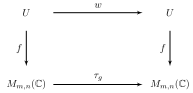

In [ ]:

dot_content = r"""digraph CommutativeDiagram {
    // Graph attributes
    rankdir=LR;
    bgcolor="transparent";

    // Graph-level positioning
    center=true;

    // Node attributes
    //node [style=filled, fillcolor=transparent shape=none, fontname="Arial"];

    // Nodes with precise positioning
    U1 [label="U", pos="0,1!", margin="0,0",shape=none];
    U2 [label="U", pos="2,1!", margin="0,0",shape=none];
    M1 [label="M_{m,n}(\\mathbb{C})", pos="0,0!", margin="0,0",shape=none];
    M2 [label="M_{m,n}(\\mathbb{C})", pos="2,0!", margin="0,0",shape=none];

    // Edges with dummy nodes
    //U1 -> f1 [style=invis];
    U1 -> U2 [style=solid];

    //U2 -> f2 [style=invis];
    M1 -> M2 [style=solid];

    //U1 -> w [style=invis];
    U1 -> M1 [style=solid];

    //M1 -> tau [style=invis];
    U2 -> M2 [style=solid];
    // Dummy label nodes
    f1 [label="f", pos="-0.1,0.5!", shape=none,margin="0,0"];
    f2 [label="f", pos="1.9,0.5!", shape=none];
    w [label="w", pos="1,1.1!", shape=none];
    tau [label="\\tau_g", pos="1,0.1!", shape=none];


}
"""


# Save the DOT content to a file
with open('commutative_diagram.dot', 'w') as f:
    f.write(dot_content)

# Define the path for the LaTeX file
tex_file_path = 'commutative_diagram'

# Convert the DOT file to LaTeX
subprocess.run(f'dot2tex --prog "neato" --docpreamble "\\usepackage[utf8]{{inputenc}} \\usepackage[T1]{{fontenc}} \\usepackage{{amssymb}}" -tmath --autosize "{tex_file_path}.dot" > "{tex_file_path}.tex"', shell=True)

# Insert LaTeX code into the notebook
insert_standalone(f"{tex_file_path}.tex")

# Compile the LaTeX file to generate the PDF
subprocess.run(f'xelatex "{tex_file_path}.tex"', shell=True)

# Convert the PDF to SVG
subprocess.run(f'pdf2svg "{tex_file_path}.pdf" "{tex_file_path}.svg"', shell=True)

# Display the SVG file in the notebook
SVG(f"{tex_file_path}.svg")



$$
w=f^{-1}\circ \tau_g \circ f \\
\mathrm{tr}(w)=\mathrm{tr}(f^{-1}\circ \tau_g \circ f) \\
$$

Pour calculer la trace, commençons par calculer $w(u_p)$. On remplace $\rho_{i,k}(g) \phi_{j,l}(g)$ par $\alpha_{i,j}^{k,l}$ pour simplifier les calculs. $k,l$ étant quelconque, on peut prendre $\nu(p)=(k,l)$ :

$$
\begin{align*}w(u_p) &= f^{-1}\circ \tau_g \circ f(u_p) \\
&= f^{-1}\circ \tau_g \circ E_{\nu(p)} \\
&= f^{-1}\circ \tau_g(E_{k,l}) \\ &= f^{-1}\left( \sum_{i,j} \alpha_{i,j}^{k,l} E_{i,j} \right) \\  &=  \sum_{i,j} \alpha_{i,j}^{k,l} f^{-1}(E_{i,j})  \\ &=  \sum_{r} \alpha_{\nu(r)}^{k,l} e_r
\end{align*}
$$

Prenons maintenant la p-ieme composante de $w(u_p)$:
$$
\begin{align}
\left(w(u_p)\right)_p&= \left( \sum_{r} \alpha_{\nu(r)}^{k,l} e_r \right)_p \\ &=   \alpha_{\nu(p)}^{k,l}  \\  &=   \alpha_{k,l}^{k,l}  \\ &= \rho_{k,k} (g) \phi_{l,l}(g)
\end{align}$$

Finalement, calculons la trace :
$$\begin{align}\mathrm{tr}(w) &= \sum_{p=1}^{mn}\left(w(u_p)\right)_p \\ &= \sum_{k,l} \rho_{k,k}(g) \phi_{l,l}(g) \\ &= \sum_{k=1}^m          \sum_{l=1}^n \rho_{k,k}(g) \phi_{l,l}(g)  \\ &= \sum_{k=1}^m  \rho_{k,k}(g) \sum_{l=1}^n   \phi_{l,l}(g) \\ &= \chi_\phi(g) \chi_\rho(g) \end{align}$$

Finalement nous appliquons l'identification d'un endomorphisme avec une matrice :
$$ w \sim W \in M_{mn,mn}(\mathbb{C}) \\
 f \sim F \in M_{mn,mn}(\mathbb{C}) \\
\tau_g \sim T_g \in  M_{mn,mn}(\mathbb{C}) \\
tr(W) =tr(F^{-1}T_gF)=tr(T_g)
$$
Donc $tr(w)=tr(\tau_g)=\chi_\tau(g)$ .

**<u>Énoncé :</u>**

4.Soit
$G$ un groupe fini et $χ,ψ$ deux caractères de $G$.
Montrer que le produit point par point $ χ⋅ψ:g↦χ(g)ψ(g) $ est un caractère de $G$ .

**<u>Résolution :</u>**



Tout d'abord nous avons déjà démontré que $\forall g \in G , \quad g \mapsto \chi_\rho(g)\chi_\phi(g)$ est un caractère par construction de $\chi_\tau$.

Nous pouvons aussi le démontrer par l'étude de $\chi_\rho(g)\chi_\phi(g)$.
Soit $G $ un groupe fini, et $ \chi, \psi $ deux caractères de $ G $. Nous voulons montrer que leur produit point par point, défini par $ (\chi\psi)(g) = \chi(g) \cdot \psi(g) $ pour tout $g \in G $, est également un caractère. Cela signifie qu'il s'agit d'un morphisme de groupe de $ G $ dans $\mathbb{C}^* $.\

Pour tout $g, h \in G$ :

$$
(\chi\psi)(gh) = \chi(gh) \cdot \psi(gh)
$$

En utilisant le fait que $\chi$et $\psi $ sont des morphismes de groupe, nous avons :

$$
\chi(gh) = \chi(g)\chi(h) \quad \text{et} \quad \psi(gh) = \psi(g)\psi(h).
$$

Substituons ces expressions dans $(\chi\psi)(gh) $:

$$
(\chi\psi)(gh) = \chi(g)\chi(h) \cdot \psi(g)\psi(h).
$$

Réorganisons les termes :

$$
(\chi\psi)(gh) = \big(\chi(g)\psi(g)\big) \cdot \big(\chi(h)\psi(h)\big).
$$

Par définition de $ \chi\psi $, cela devient :

$$
(\chi\psi)(gh) = (\chi\psi)(g) \cdot (\chi\psi)(h).
$$



Ainsi, $ \chi\psi $ vérifie la propriété de morphisme de groupe. Cela montre que le produit point par point de deux caractères $ \chi $ et $ \psi $ est lui-même un caractère.

###Coefficients de Clebsch-Gordan (ouverture - calculs faux à vérifier)

La décomposition du produit tensoriel peut s'écrire comme suit :

$$
\chi_{V^{(1)} \otimes V^{(2)}}(g) = \sum_{V^{(3)}} m_{12}^{(3)} \chi_{V^{(3)}}(g),
$$
**théorème de Maschke?**

où le produit des caractères est donné par :

$$
\chi_{V^{(1)} \otimes V^{(2)}}(g) = \chi_{V^{(1)}}(g) \cdot \chi_{V^{(2)}}(g).
$$
**proposition 4.5.1**

Les coefficients de multiplicité $m_{12}^{(3)}$ sont obtenus à partir de la formule d'orthogonalité des caractères :

$$
m_{12}^{(3)} = \frac{1}{|G|} \sum_{g \in G} \chi_{V^{(1)}}(g) \chi_{V^{(2)}}(g) \overline{\chi_{V^{(3)}}(g)}.
$$
**première relation d'orthogonalité**

 Expression d'un état quantique:



$$
\lvert j,m \rangle = \sum_{m_1, m_2} C_{j_1, m_1; j_2, m_2}^{j, m} \lvert j_1, m_1 \rangle \otimes \lvert j_2, m_2 \rangle
$$



Cela signifie que chaque état $ \lvert j_1, m_1 \rangle \otimes \lvert j_2, m_2 \rangle $ contribue à l'état $ \lvert j, m \rangle $ avec un coefficient $ C_{j_1, m_1; j_2, m_2}^{j, m} $.





$$
\text{Tr}\left(g \mid V^{(1)} \otimes V^{(2)}\right) = \sum_{V^{(3)} } m_{12}^{(3)} \text{Tr}\left(g \mid V^{(3)}\right)
$$
**lemme 4.3.13**


$⟨j, m | g | j, m⟩ = ∑_{m_1, m_2} |C^{j, m}_{j_1, m_1; j_2, m_2}|^2 ⟨j_1, m_1 | g | j_1, m_1⟩ ⟨j_2, m_2 | g | j_2, m_2⟩$

The terms $⟨j_1, m_1 | g | j_1, m_1⟩$ and $⟨j_2, m_2 | g | j_2, m_2⟩$ are simply the diagonal matrix elements of g in the representations $ V^{(1)}$ and $V^{(2)}$, respectively. Therefore, they are equal to the characters of g in these representations:
$⟨j, m | g | j, m⟩ = ∑_{m_1, m_2} |C^{j, m}_{j_1, m_1; j_2, m_2}|^2 χ_{V^{(1)}}(g) χ_{V^{(2)}}(g)$

To finish the computation and establish the relationship between the Clebsch-Gordan coefficients and the multiplicities $m_{12}^{(3)}$, we need to sum over all possible values of $j$ and $m$ for a given tensor product $V^{(1)} ⊗ V^{(2)}$.

Let's consider the character of the tensor product representation $V^{(1)} ⊗ V^{(2)}$:
$$
χ_{V^{(1)} ⊗ V^{(2)}}(g) = ∑_{j, m} ⟨j, m | g | j, m⟩
$$

Substituting the expression for $⟨j, m | g | j, m⟩$ derived earlier:

$$
χ_{V^{(1)} ⊗ V^{(2)}}(g) = ∑_{j, m} ∑_{m_1, m_2} |C^{j, m}_{j_1, m_1; j_2, m_2}|^2 χ_{V^{(1)}}(g) χ_{V^{(2)}}(g)
$$

We can rearrange the summation and factor out the characters:

$$
χ_{V^{(1)} ⊗ V^{(2)}}(g) = χ_{V^{(1)}}(g) χ_{V^{(2)}}(g) ∑_{j, m} ∑_{m_1, m_2} |C^{j, m}_{j_1, m_1; j_2, m_2}|^2
$$

Now, recall that the character of a tensor product representation can be decomposed into a sum over irreducible representations:

$$
χ_{V^{(1)} ⊗ V^{(2)}}(g) = ∑_{V^{(3)}} m_{12}^{(3)} χ_{V^{(3)}}(g)
$$

Comparing the two expressions for the character, we can identify the following relationship:

$$
∑_{j, m} ∑_{m_1, m_2} |C^{j, m}_{j_1, m_1; j_2, m_2}|^2 = m_{12}^{(3)}
$$

This equation tells us that the sum of the squared Clebsch-Gordan coefficients for a given irreducible representation $V^{(3)}$ in the decomposition of $V^{(1)} ⊗ V^{(2)}$ is equal to the multiplicity $m_{12}^{(3)}$ of that representation.

In essence, the Clebsch-Gordan coefficients determine the weights with which the uncoupled basis states contribute to the coupled basis states. The sum of these weights, squared, gives the multiplicity of the irreducible representation in the tensor product decomposition.

$∑_{j, m} ∑_{m_1, m_2} |C^{j, m}_{j_1, m_1; j_2, m_2}|^2 = m_{12}^{(3)}$


$$∑_{j, m} ∑_{m_1, m_2} |C^{j, m}_{j_1, m_1; j_2, m_2}|^2 = ∑_{V^{(3)}} m_{12}^{(3)}$$


$$∑_{j, m} |C^{j, m}_{j_1, m_1; j_2, m_2}|^2 = m_{12}^{(3)}$$

?!

Klesch
operateur sharp
Imprimer, rechercher coquilles